In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import zipfile
import os
import pandas as pd
import numpy as np
import pathlib
import datetime
from collections import Counter
import copy
import matplotlib.pyplot as plt
import time

/home/muhammadayub/anaconda3/envs/py35-2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Helpful Functions

In [3]:
def cleanURL(url):
    p = pathlib.Path(url)
    path = str(p.as_posix()) 
    return path 


def getDF(loc, sheetname):
    dataframe = pd.read_excel(loc, sheetname)
    #https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe
    dataframe = dataframe.applymap(lambda x: x.strip() if type(x) is str else x)
    return dataframe

def printNulls(df):
    null_columns = df.columns[df.isnull().any()]
    return df[null_columns].isnull().sum() 


def writeDFToFile(dfs, path_): #dfs is an array of dataframes and their sheet names , path needs to have
    time_ = str(datetime.datetime.now())
    current_date_time = time_[0:time_.index(".")]
    current_date_time = current_date_time.replace(":", "-")
    task4_fileoutput = path_+current_date_time+".xlsx"

    writer = pd.ExcelWriter(task4_fileoutput)
    
    for df_tuple in dfs:  
        df = df_tuple[0]
        sheetName = df_tuple[1]
        df.to_excel(writer, sheetName)
    print("file written to :       " + task4_fileoutput)
    writer.save()
    
def plotImg(img):
    if(type(img) ==type(None)):
        img =outputsDataReal[10000]
    arr = []
    for a in img:
        arr = [a] + arr
    plt.pcolor( arr, cmap = 'gist_ncar' )

    plt.show()    

cwd = os.getcwd()
cwd

'/home/muhammadayub/Desktop/CS230/Notebooks/re'

# Load Data

TypeError: Invalid dimensions for image data

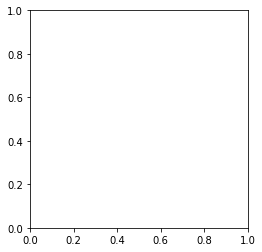

In [8]:

beatAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/beats.npy'))
# districtAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/districtArea.npy'))
# wardAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/wardArea.npy'))
# print(np.sum(wardAreaMask, axis = 0).shape)
# plt.imshow(beatAreaMask)
# plt.show()
# plt.imshow(districtAreaMask)
# plt.show()
plt.imshow(beatAreaMaskT)
plt.show()
beatAreaMaskT = beatAreaMask.T

### Using the data loader methodology:

In [7]:
################
# Constants 
################
iHeight = 256
iWidth = 256


################
# Load all the data , for the larger data values , just run  
################

# load all the data #CHANGEME
# datesb = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\dates_data_b.npy'))
# dates = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\dates_data.npy'))
# buildings = np.load(cleanURL(r'C:\Users\User\Documents\CS230 Project\new_github\data_for_cnn_training\x__buildings_b.npy'))
datesb = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/dates_data_b.npy'))
# dates = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/dates_data.npy'))
buildings = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__buildings_b.npy'))
beatAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/beats.npy'))
# districtAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/districtArea.npy'))
# wardAreaMask = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/wardArea.npy'))



#make sure there are no nan values in buildings 
mask = np.isnan(buildings)
indices = np.where(mask ==True)
z = indices[0]
y = indices[1]
x = indices[2]
buildings[z,y,x] = -1


businesses = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__businesses_b.npy'))
socio = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__socio_b.npy'))
#lentries = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/x__Lentries_c.npy'))#, mmap_mode  = 'r')#CHANGEME
waterway = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/waterway.npy'))
##KLUDGE: This is a quick fix, just set a lot of the data to 0
# waterway[:,170:]= 1

#get all the masks used

################
# Preprocess every image value to be its transpose
################
# buildings  buildingsT -> buildingsTStacked
# businesses    businessesT -> businessesTStacked
# socio   socioT -> socioTStacked
buildingsT= buildings.T
businessesT= businesses.T
socioT = socio.T

datesb= datesb.astype(np.float32)
businessesT = businessesT.astype(np.float32)
buildingsT = buildingsT.astype(np.float32)
socioT = socioT.astype(np.float32)
waterwayT = waterway.T
datesb = datesb.reshape((len(datesb), 1, 1, 4)) #for faster look ups

beatAreaMaskT = beatAreaMask.T
beatAreaMaskT = beatAreaMaskT.reshape(256,256,1)
beatAreaMaskT = beatAreaMaskT.astype(np.float32)

print('done0')

done0


In [45]:
# xy = np.full((256,256,4), 1, dtype = np.float32)
# dateLayers = xy* datesb
# dateLayers.shape

In [6]:
#all the outputs
outputsData =[]
for i_ in range(1, 53): # /home/muhammadayub/Desktop/CS230/training_data/outputs/y__c2_127.npy
    y_ = np.load(cleanURL(r'/home/muhammadayub/Desktop/CS230/training_data/outputs/y__c'+str(i_)+'_127.npy'))#, mmap_mode  = 'r')
    outputsData.append(y_)

In [7]:
# if at all possible  #CHANGEME
outputsDataReal = np.concatenate(outputsData, axis = 0)
print(outputsDataReal.shape)
for i_ in range(len(outputsData)):
    outputsData[i_] =None
    
# if at all possible  #CHANGEME
for i_ in range(len(outputsDataReal)):
    outputsDataReal[i_] =outputsDataReal[i_].T    # outputs are transposed once 
print('run once')
# print(outputsDataReal.max())#33 is max, 0 is min
# print(outputsDataReal.min())

(155928, 256, 256)
run once


Remove the non negative data (to balance out the classes sum what)

In [8]:
notNeg1 = np.where(outputsDataReal!= -1)

In [9]:
indices = np.array(list(set(notNeg1[0]))) #get all of the indices needed
print(indices.shape)
notNeg1=None 

(74837,)


In [10]:
sortedIndices = np.sort(indices)
miniBatchIndices = sortedIndices[:74800]  #the cutoff of the data 

In [13]:
#the indices are the ones we want from the outputsDataReal and from datesB
print(outputsDataReal.shape)
print(datesb.shape)
#shrink the arrays 
outputsDataReal = outputsDataReal[miniBatchIndices]
datesb = datesb[miniBatchIndices]
#reprint the sizes 
print(outputsDataReal.shape)
print(datesb.shape)


(155928, 256, 256)
(155928, 1, 1, 4)
(74800, 256, 256)
(74800, 1, 1, 4)


In [14]:
#sort the array of indices , then create MINIBATCHES 
miniBatchIndices = np.arange(74800)
print(miniBatchIndices.shape)
print(miniBatchIndices)

(74800,)
[    0     1     2 ... 74797 74798 74799]


#### Generate minibatches. Shuffle the minibatches, have a function to return a minibatch of X and Y

In [22]:
TIMES_OF_DAY = 24
MINIBATCH_SIZE = 200
MINIBATCHES_AMT = int(len(miniBatchIndices)/MINIBATCH_SIZE) #or 374 minibatches of 200 each 

print("Amount of minibatches " , MINIBATCHES_AMT)
train_split = int(MINIBATCHES_AMT*.90)
dev_split = int(MINIBATCHES_AMT*.05)
test_split = MINIBATCHES_AMT - train_split - dev_split

print(train_split, dev_split, test_split )

Amount of minibatches  374
336 18 20


In [23]:
minibatches = np.split(miniBatchIndices,MINIBATCHES_AMT)
backup_minibatches = copy.deepcopy(minibatches)

devMiniBatches = minibatches[train_split:train_split+dev_split]
testMiniBatches = minibatches[train_split+dev_split:-1]# remove the last minibatch
minibatches = minibatches[:train_split] #training set  #must be at the end
print(len(devMiniBatches+testMiniBatches+minibatches))
print(len(devMiniBatches), len(testMiniBatches) , len(minibatches))

373
18 19 336


In [82]:
# datesb -- no need 
# dates -- no need
# buildings  buildingsT -> buildingsTStacked
# businesses    businessesT -> businessesTStacked
# socio   socioT -> socioTStacked
# lentries 
# waterway  -- not part of data 
# outputsData 

def stackManyTimes(_3dimg,times):
    _3dimg_shape = _3dimg.shape
    result = np.zeros(shape=(times, _3dimg_shape[0], _3dimg_shape[1],_3dimg_shape[2] ), dtype=np.float32)
    for x in range(times):
        result[x] = _3dimg
    return result

#next steps -> add lentries, temperature, and masks 
def staticImages():
    
    #beats
    #beatsLayers = stackManyTimes(beatAreaMaskT, MINIBATCH_SIZE)
    
    #step 2. Buildings 10 layers 
    buildingLayers = stackManyTimes(buildingsT, MINIBATCH_SIZE)  # buildingsT should be (256,256,10) and result should (150, 256, 256, 10)
  
    #step 3. 
    businessesLayers = stackManyTimes(businessesT, MINIBATCH_SIZE)
    
    #step 4. L entries
    #come back to this one   => must be transposed!!!
    LentryLayers = None
    
    #step 5. socio
    socioLayers = stackManyTimes(socioT, MINIBATCH_SIZE)
    
    staticImage = np.concatenate((buildingLayers,businessesLayers,socioLayers) , axis = -1)   #  beatsLayers
    return staticImage

staticImage  = staticImages()


# now we write a function that will return to us the correct minibatch , with all the image data generated
def generateMinibatch(minibatchIndices):    #everything must be transposed
    #general steps:
    #get the x inputs
    #    same as the file of text 
    
    #step 1. dates (make 12 layers of month, day, year , timeOfDay)  # dateLayers don't need to be transposed -> just 1 value
    dateLayers = generateDatesLayers2(minibatchIndices, datesb) # (150, 256, 256, 4)  => len(minibatchIndices) = 150
    
    #step 6. temperature #should be format of
    #pass on this for now -> will add this for later iterations
    
    #step 7. concat everything
    inputImage = np.concatenate((dateLayers,staticImage) , axis = -1)
#     print(np.where((inputImage[:4]==dateLayers)==False))
#     print(np.where((inputImage[4:14]==buildingLayers)==False))

    #step 7. outputs
    output_image = outputsDataReal[minibatchIndices]  # calculateOutput(minibatchIndices)
    return inputImage, output_image#, waterway


xy_ = np.full((256,256,4), 1, dtype = np.float32)
def generateDatesLayers2(minibatchIndices, datesb):
    dateLayers = datesb[minibatchIndices] # (len(minibatchIndices) , 4)
    return xy_* dateLayers 

# def generateDatesLayers(minibatchIndices, datesb):
#     base_img_mask = np.ones((256, 256), dtype=np.float32)
#     xy = np.dstack([base_img_mask]*4) # shape (256, 256, 4)
#     dateLayers = datesb[minibatchIndices] # (len(minibatchIndices) , 4)
#     dateLayersReshaped = dateLayers.reshape((len(dateLayers), 1,1,dateLayers.shape[1])) # (len(minibatchIndices),1,1 , 4)
#     xyz = xy* dateLayersReshaped 
#     return xyz

def transpose3dImage(img):
    img_T = img.T #tested this actually does what we wante it to do.  
    return img_T


def calculateOutput(sample):
    batchMin = min(sample)#67050
    batchMax = max(sample)#67199
    #     batchMax  = 69050
    #print("batch min " , batchMin," batch max ", batchMax )
    remMin = batchMin % BATCHSIZE_Y
    multipleMin = int(batchMin / BATCHSIZE_Y)

    remMax = batchMax % BATCHSIZE_Y
    multipleMax = int(batchMax / BATCHSIZE_Y)
    
    batch = None
    if(multipleMin != multipleMax):# have to concatenate  batch size can never be more than 3000#
        print('here')
        batch = np.concatenate((outputsData[multipleMin],outputsData[multipleMax]), axis = 0)
    else:
        print('not here')
        batch = outputsData[multipleMin]

    offset = multipleMin*BATCHSIZE_Y
    sample_ = np.array(sample)-offset
    data_output = batch[sample_]
    return data_output

# inputImage64 =  split256by256StackOnAxis(inputImage)
def split256by256StackOnAxis(inputImg):  #returns the images in (64 , 64, numberOfChannels)
    imagesList = np.split(inputImg, 4, axis = 1)
    images64by64 = []

    for almostImage in imagesList:
        imagesList64by64 = np.split(almostImage, 4, axis = 2) # axis is 0, 1, 2
        for actual64by64 in imagesList64by64:
            images64by64.append(actual64by64)
    #     for i,_64 in enumerate(images64by64):
    #         print(i, _64.shape)
    return np.concatenate(images64by64, axis = 0)

def getOutputYVector(y_output_image64, numCats): # y_output_image64 is of shape (3200,64,64)  , 34 categories + -1
    result = np.zeros((len(y_output_image64), numCats), dtype=np.float32)
    cCount = None 
    for i_, img in enumerate(y_output_image64):
        cCount = Counter(img.flatten())
        if(len(np.unique(img)) == 1): #if all -1's
            result[i_][0] = 1
        else: # get the second most common thing (since -1 are going to be the most common)
            result[i_][int(cCount.most_common()[1][0])+1] = 1 # get the second value (index of 1) of most common array
    return result

    #get the argmax for now  -1 goes to 0, 0 goes to 1, etc. until you have 33 going to 34   -> kludge need to set this to -1
    #result[i_][int(cCount.most_common()[0][0])+1] = 1

def transformTo64(inputImage, output_image, numCats):
    inputImage64 =  split256by256StackOnAxis(inputImage)
    output_image64 = split256by256StackOnAxis(output_image)
    output_image64 = getOutputYVector(output_image64, numCats) #34 categories since we use -1s, but then shave them off
    return inputImage64, output_image64

def generateWaterWayMask(waterwayT, threshold):# between 0 and 4096, need atmost 200 to be water 
    waterwayMask = np.zeros((MINIBATCH_SIZE, 256,256), dtype=np.float32)
    for i_ in range(len(waterwayMask)):
        waterwayMask[i_] = waterwayT
        
    #now that we have the ( 200, 256,256)  (sizeOfOneMiniBatch is 200 for example)
    #we can break it up into the 64 by 64 images
    waterwayMask64 = split256by256StackOnAxis(waterwayMask)
    #from here, you count up each one of the 64 by 64 images and set to the threshold
    waterwayMaskIndices = [] # include if they are one 
    for i_ in range(len(waterwayMask64)):
        if(np.sum(waterwayMask64[i_]) <= threshold): #> would mean you have more 1's than allowed -> not tolerable 
            waterwayMaskIndices.append(i_)
    return waterwayMaskIndices

print('done')

done


#### Generate minibatches. Shuffle the minibatches, have a function to return a minibatch of X and Y

In [77]:
WaterWayMask = generateWaterWayMask(waterwayT, 400)

a_ = time.time()
for x_ in range(40):
    minibatch = minibatches[x_]
    a,b = generateMinibatch(minibatch)
    inputImage64, output_image64 = transformTo64(a, b,35)
    c = output_image64[WaterWayMask]
    d = inputImage64[WaterWayMask]
b_ = time.time()

# ran 88 seconds for 20 times  - with generating waterway mask each time
# ran 175.67435598373413  seconds for 40 times  - with generating waterway mask each time - 4.39 seconds per load 
# ran 164.55799078941345   seconds for 40 times  - without generating waterway mask each time 
# ran 173.7626793384552 seconds for 40 times  - with adding beats layer 

In [78]:
b_ - a_

171.3959996700287

In [40]:
output_image64 = split256by256StackOnAxis(b)

a_ = time.time()
for x_ in range(20):
    output_image64 = getOutputYVector(output_image64, 35)
b_ = time.time()

In [411]:
print(b_ - a_)
# 0:00:44.504664 for all 4 for 10 runs
# 0:00:08.687448 for just generateMinibatch() function for 10 runs  -> 
# 0:00:03.770278 applying waterway mask => for 10 runs  --> .37 seconds

# 0:00:33.538946 for transformTo64() for 10 runs 
# len(WaterWayMask)
aa,bb = generateMinibatch(minibatch)
aa.shape

0:00:03.770278


(200, 256, 256, 26)

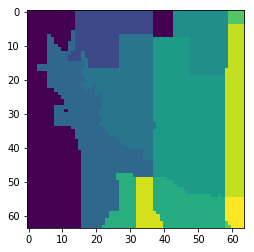

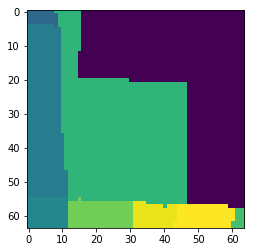

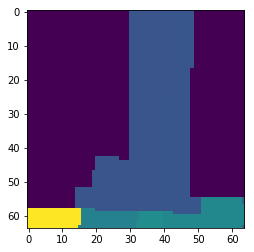

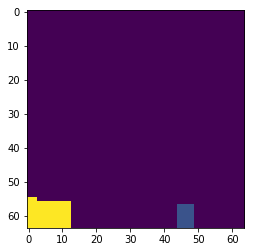

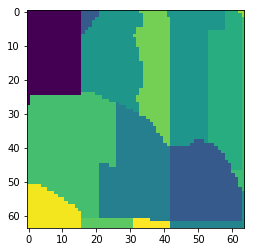

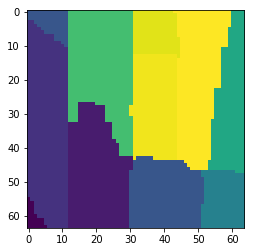

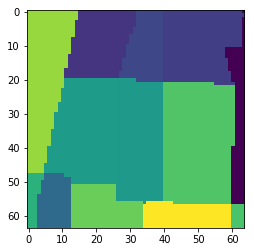

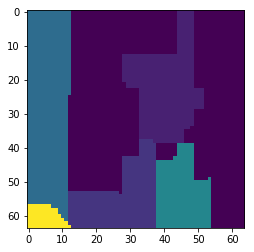

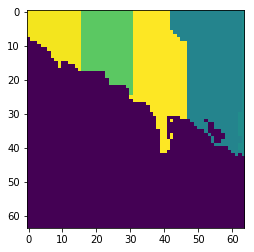

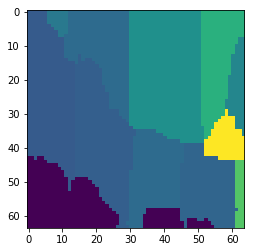

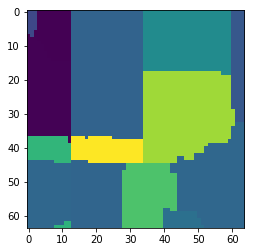

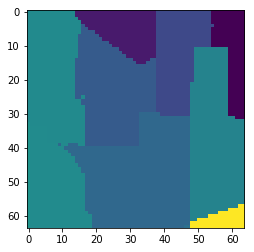

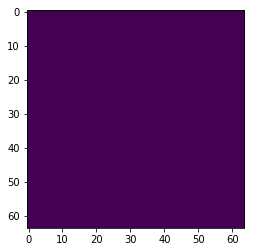

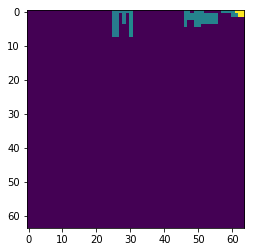

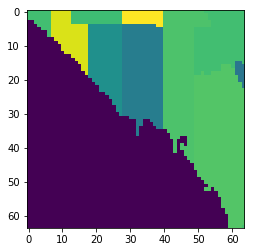

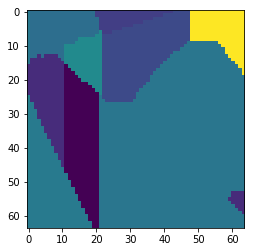

In [417]:
# imgb = img.reshape(256, 4, 64)

# for i_ in range(4):
#     plt.imshow(imgb[:,i_, :]) 
#     plt.show()

# imgb = img.reshape(4, 64, 4, 64)

# for i_ in range(4):
#     for j_ in range(4):
        
#         plt.imshow(imgb[i_,:,j_, :]) 
#         plt.show()

imgb = img.reshape(4, 64, 4, 64).swapaxes(1,2).reshape(16,64,64)

a_reshaped = a.reshape(200, 4, 64, 4, 64, 26).swapaxes(2,3).reshape(200,16,64,64,26).reshape(3200, 64,64,26)
# a_reshaped = a.reshape(200, 4, 64, 4, 64, 26).swapaxes(2,3)
# print(a_reshaped.shape)

for i_ in range(16):
    plt.imshow(imgb[i_, :, :]) 
    plt.show()

    
    




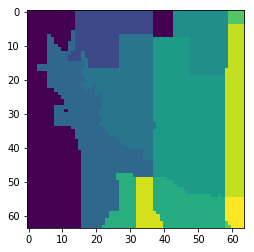

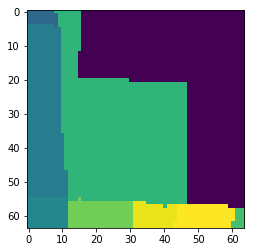

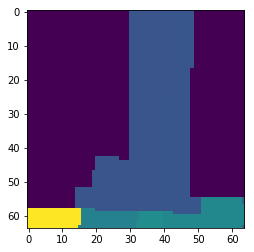

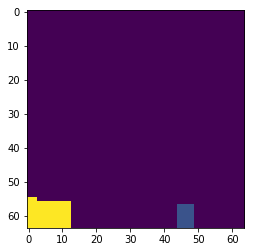

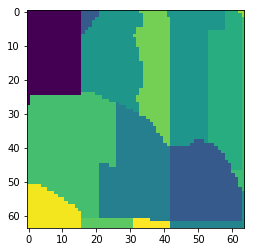

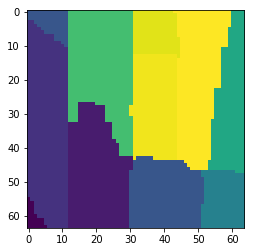

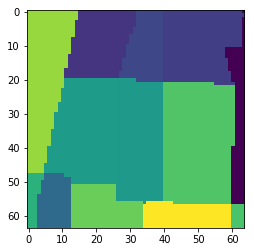

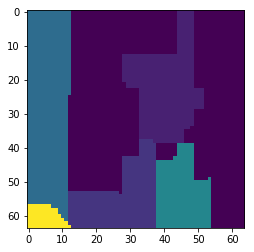

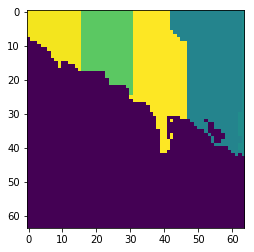

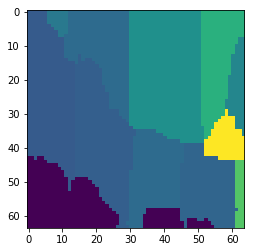

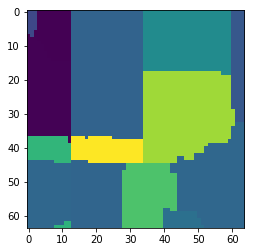

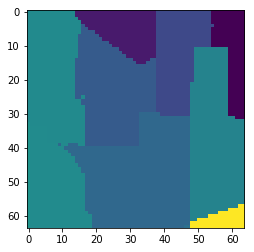

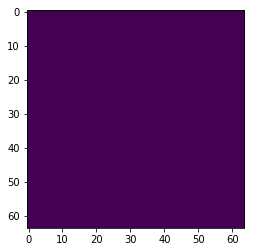

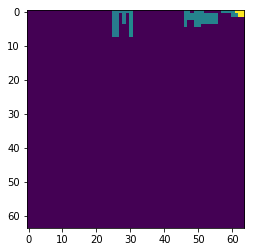

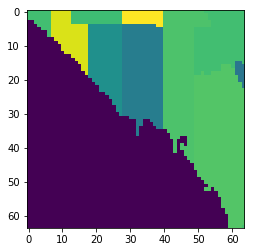

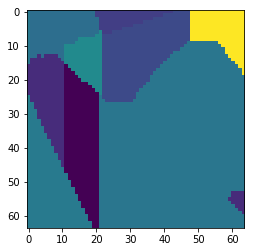

In [418]:
for i_ in range(16):
    plt.imshow(a_reshaped[i_,:, :, 20]) 
    plt.show()

# inputImage64 =  split256by256StackOnAxis(a)
# areEqual = (abc == a_reshaped)
# # np.where()
# areEqual

In [421]:
inputImage64 =  split256by256StackOnAxis(a)
a_reshaped = a.reshape(200, 4, 64, 4, 64, 26).swapaxes(2,3).reshape(200,16,64,64,26).reshape(3200, 64,64,26)

areEqual = (a_reshaped == inputImage64)
# np.where()
abc = np.where(areEqual == False)



In [ ]:
abc.sh

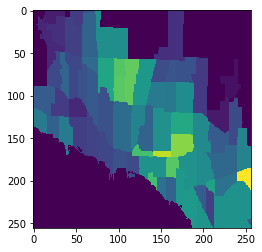

(4, 4, 64, 64)


In [407]:
img =  a[0, :, :, 20]
# imgb = img.reshape(64,64, 16)   # 64 rpws. 64 columns , 64, by 
imgb = img.reshape(4, 64, 4, 64).swapaxes(1,2)#.reshape(16, 64, 64)   # 64 rpws. 64 columns , 64, by 


plt.imshow(img)
plt.show()
print(imgb.shape)
# for i_ in range(16):
#     plt.imshow(imgb[:,:,i_]) 
#     plt.show()


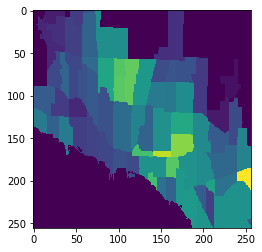

In [362]:
plt.imshow(a[0, :, :, 20]) # a is (200, 256, 256, 26)
plt.show()

(200, 256, 256, 26)
(3200, 64, 64, 26)
(200, 256, 256, 10)


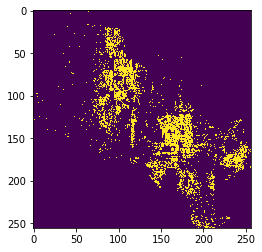

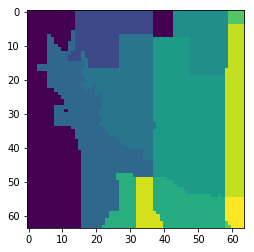

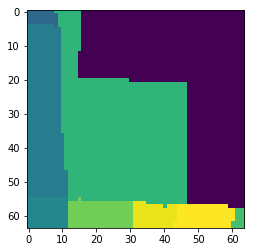

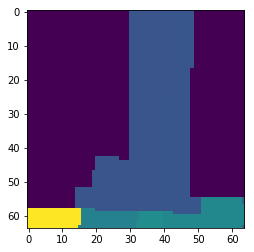

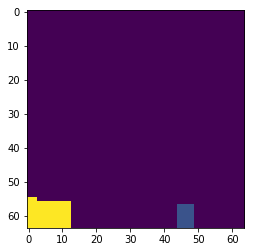

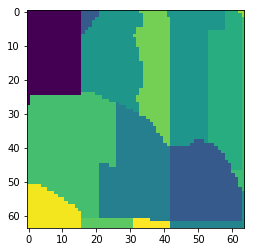

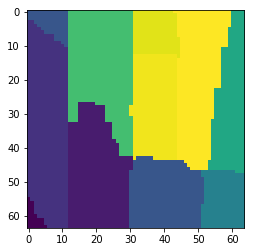

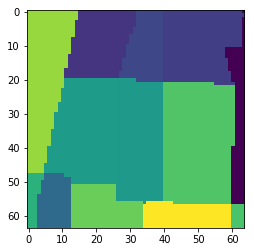

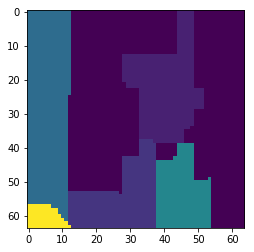

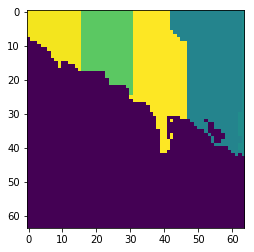

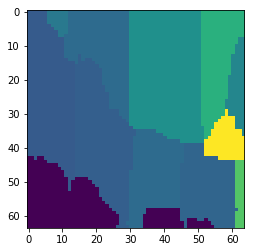

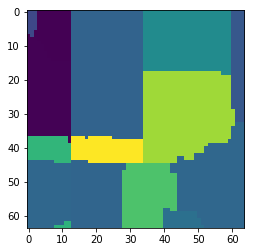

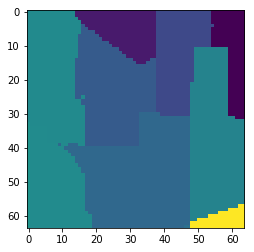

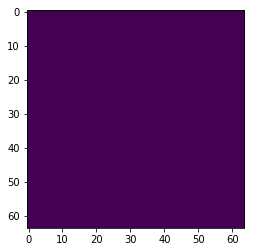

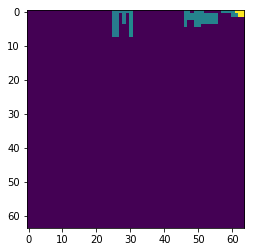

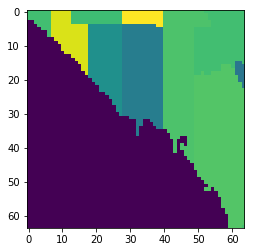

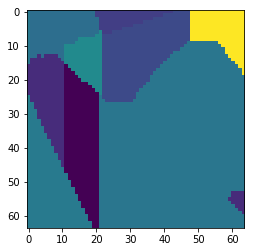

In [382]:
print(a.shape)
inputImage64 =  split256by256StackOnAxis(a)
print(inputImage64.shape)

print(buildingLayers.shape)
plt.imshow(a[0, :, :, 4])
plt.show()
abc = a.reshape(( 3200, 64 ,64,  26))

for x_ in range(16):
    plt.imshow(inputImage64[ x_*200 , : , : ,  20])
    plt.show()


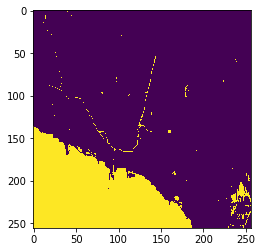

In [379]:
plt.imshow(waterwayT)
plt.show()

(3200, 64, 64)


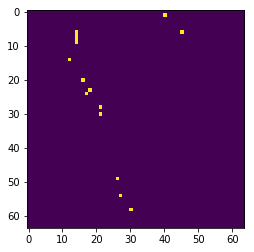

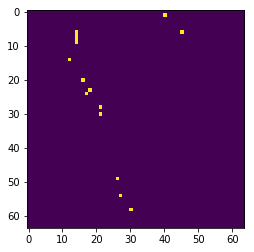

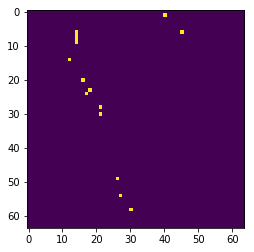

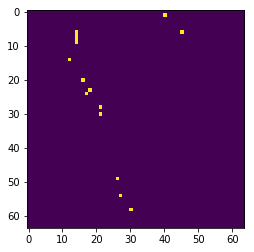

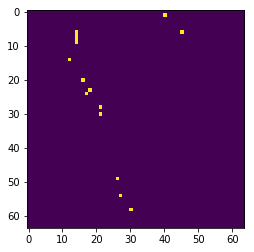

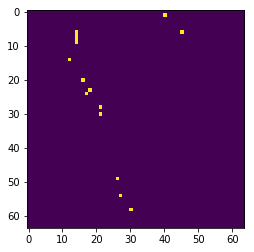

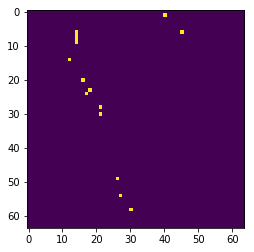

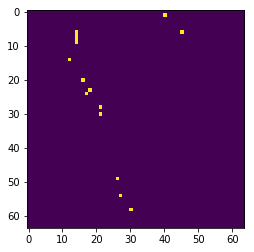

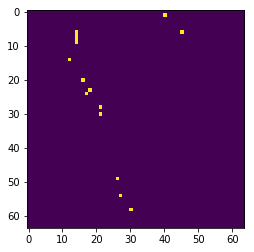

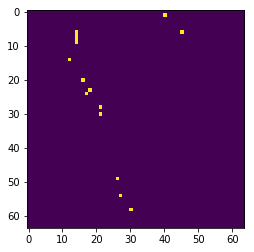

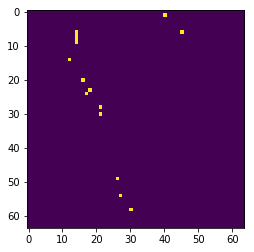

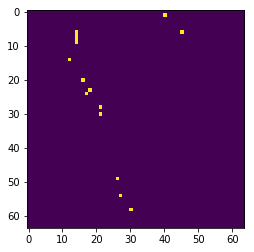

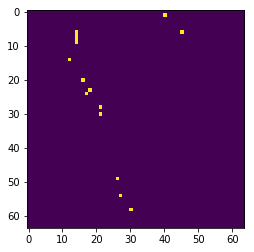

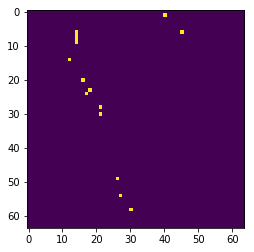

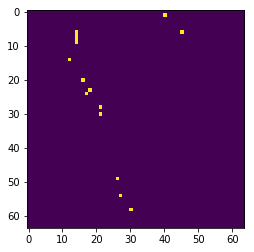

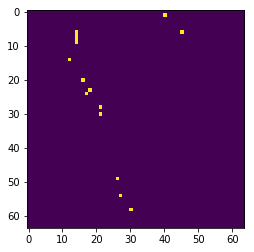

In [380]:
sizeOfOneMiniBatch = int(len(indices_)/MINIBATCHES_AMT)
waterwayMask = np.zeros((sizeOfOneMiniBatch, 256,256), dtype=np.float32)
for i_ in range(len(waterwayMask)):
    waterwayMask[i_] = waterwayT

#now that we have the ( 200, 256,256)  (sizeOfOneMiniBatch is 200 for example)
#we can break it up into the 64 by 64 images
waterwayMask64 = split256by256StackOnAxis(waterwayMask)
print(waterwayMask64.shape)
for x_ in range(16):
    plt.imshow(waterwayMask64[ x_, : , : ])
    plt.show()

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  T

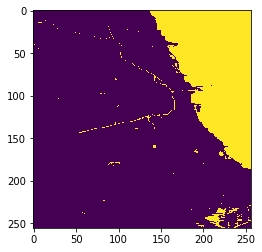

In [201]:


# abc = splitWaterWay(waterway)
# abc.shape


imagesList = np.split(waterway, 4, axis = 0)
images64by64 = []
for almostImage in imagesList:
    imagesList64by64 = np.split(almostImage, 4, axis = 1) # axis is 0, 1, 2
    for actual64by64 in imagesList64by64:
        images64by64.append(actual64by64)
        
        
plt.imshow(waterway)

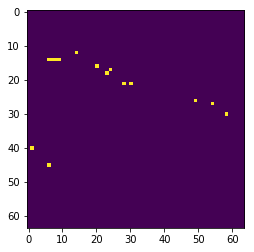

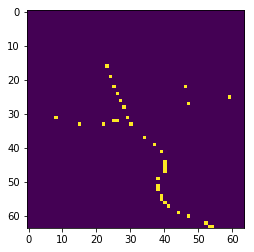

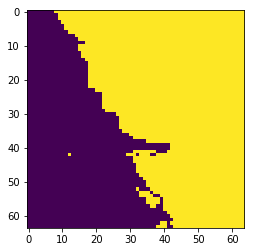

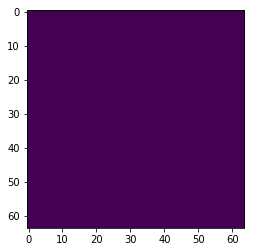

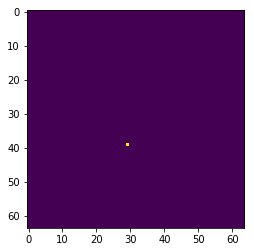

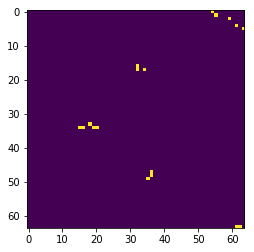

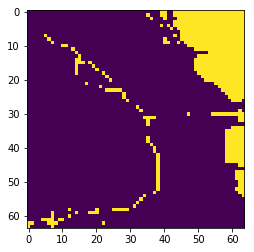

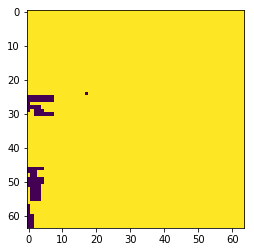

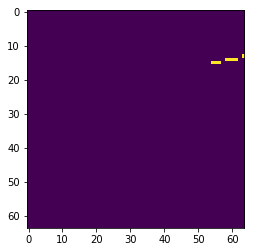

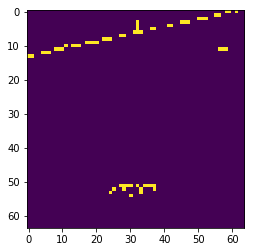

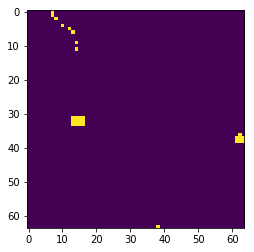

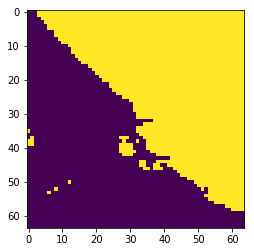

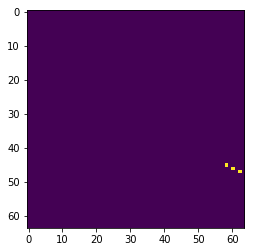

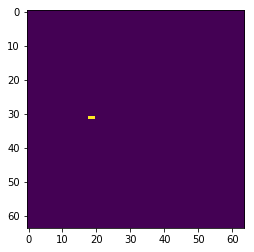

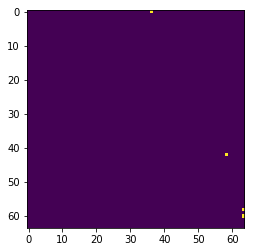

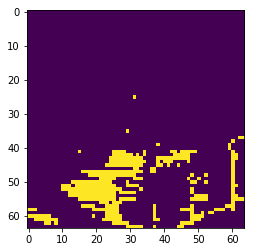

In [199]:
for im in images64by64:
    plt.imshow(im)
    plt.show()

In [ ]:
def splitWaterWay(waterwayImg):
    imagesList = np.split(waterwayImg, 4, axis = 0)
    images64by64 = []

    for almostImage in imagesList:
        imagesList64by64 = np.split(almostImage, 4, axis = 1) # axis is 0, 1, 2
        for actual64by64 in imagesList64by64:
            images64by64.append(actual64by64)
    #     for i,_64 in enumerate(images64by64):
    #         print(i, _64.shape)
    return np.concatenate(images64by64, axis = 0)

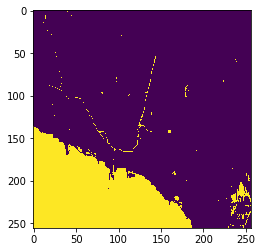

In [219]:
# abc = np.concatenate(images64by64, axis )
# abc.shape
plt.imshow(waterway.T)
plt.show()

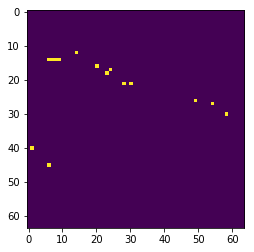

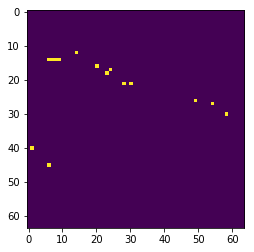

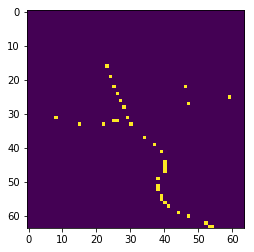

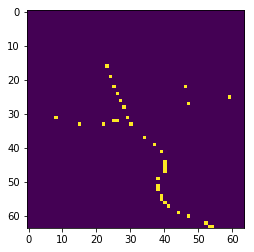

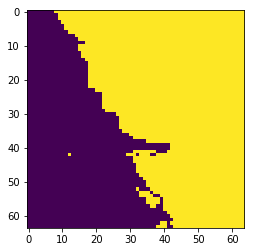

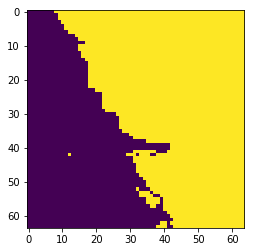

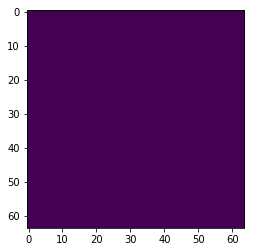

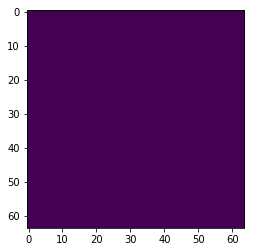

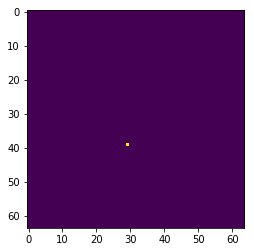

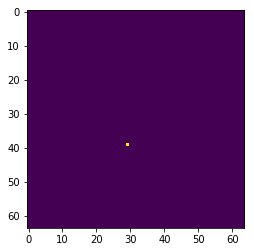

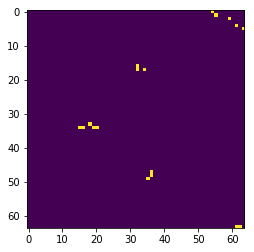

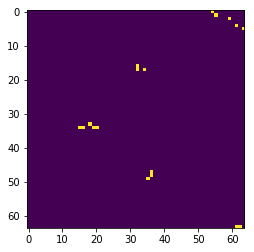

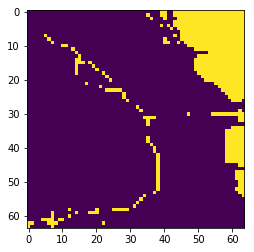

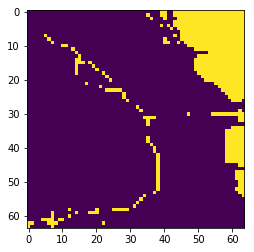

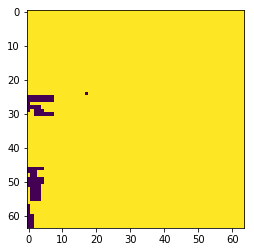

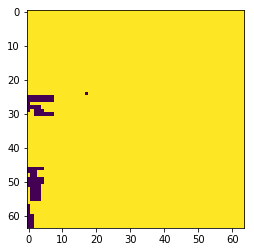

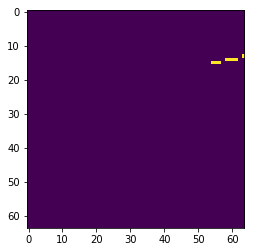

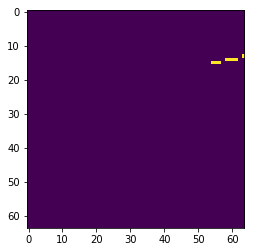

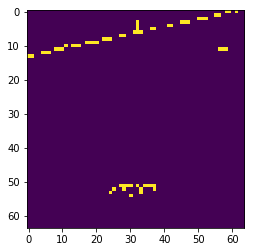

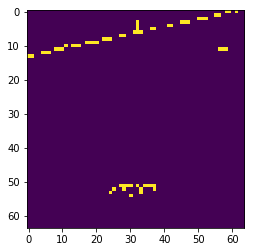

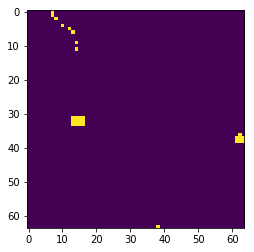

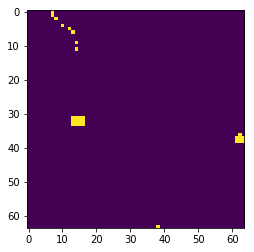

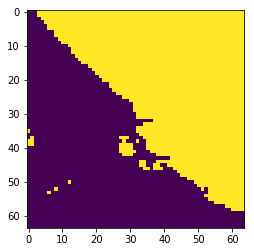

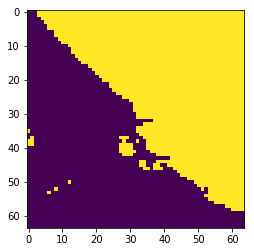

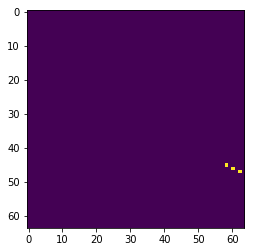

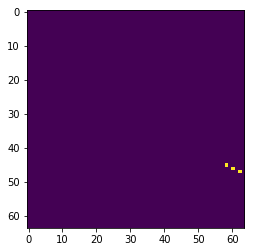

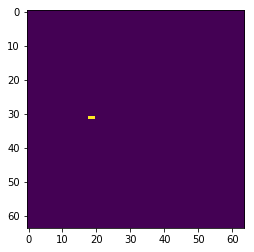

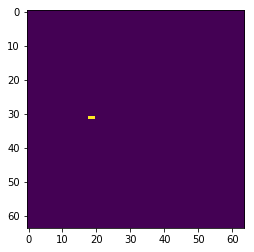

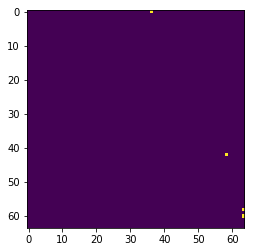

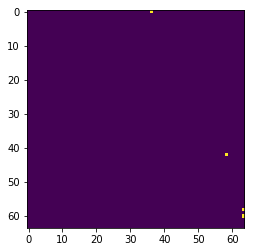

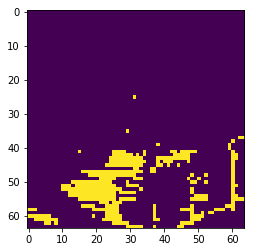

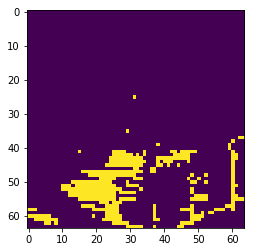

In [207]:
waterway2 = np.array([waterway, waterway])
waterway2.shape
abc = split256by256StackOnAxis(waterway2)
abc.shape
for im in abc:
    plt.imshow(im)
    plt.show()

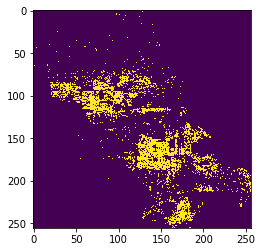

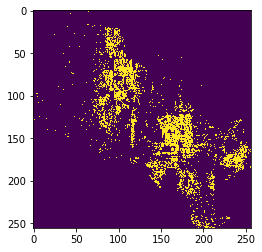

(256, 256, 10)


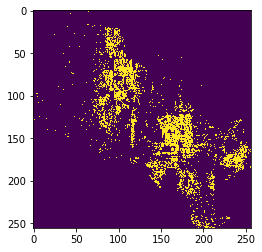

In [238]:
plt.imshow(buildings[0])
plt.show()

plt.imshow(buildingsT[:,:,0])
plt.show()

print(buildingsT.shape)
buildingLayers  = stackManyTimes(buildingsT, MINIBATCH_SIZE)
buildingLayers.shape

plt.imshow(buildingLayers[1, :, :, 0])
plt.show()

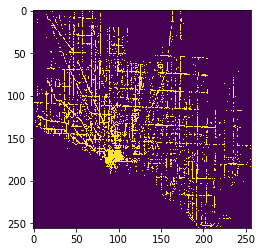

In [240]:
businessesLayers = stackManyTimes(businessesT, MINIBATCH_SIZE)
businessesLayers.shape

plt.imshow(businessesLayers[0, :, :, 0])
plt.show()

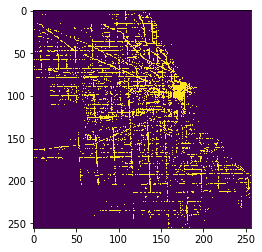

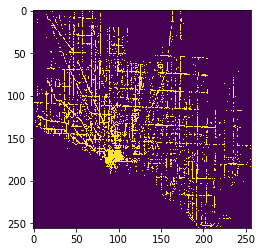

In [244]:
plt.imshow(businesses[0])
plt.show()

plt.imshow(businessesLayers[1, :, :, 0])
plt.show()

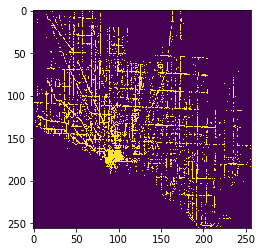

In [250]:
staticImage = np.concatenate((buildingLayers,businessesLayers) , axis = -1)
staticImage.shape

plt.imshow(staticImage[0,:,:,10])
plt.show()
# minibatch

In [319]:
a = time.time()
for x_ in range(100):
    dateLayers = generateDatesLayers2(minibatch, datesb) # (150, 256, 256, 4)  => len(minibatchIndices) = 150
b = time.time()

b - a    

19.500203847885132

# Model Definition (based off research paper)

In [83]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """


    X = tf.placeholder(shape =[None, n_H0, n_W0, n_C0], dtype = np.float32, name="X")
    Y = tf.placeholder(shape  =[None, n_y], dtype = np.float32 , name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [84]:
X, Y = create_placeholders(64, 64, 26, 35)  #will have 35 , 34 real values and 1 fake value
print ("X = " + str(X))
print ("Y = " + str(Y))


X = Tensor("X:0", shape=(?, 64, 64, 26), dtype=float32)
Y = Tensor("Y:0", shape=(?, 35), dtype=float32)


## First CNN Trial

### First filter shape: (10 , 10,3 , 3) stride = 2, valid padding
    
    (64 +2p - f)/s +1 => (64+0-10)/2+1 = 28
    So, (?, 64, 64, 3) * (10 , 10 , 3,  3) = (?, 28, 28, 3 )
    
### Average Pooling Layer: (3 , 3 , 3) stride = 1, Padding = SAME
    
    (28 +2p - f)/s +1 => (28+2*1-3)/1+1 = 28
    So, (?, 28, 28, 3) * ( 3 , 3,  3) = (?, 28, 28, 3 )
    
    
### Second filter shape: (6 , 6 ,3, 2) stride = 2, valid padding
    
    (28 +2p - f)/s +1 => (28+0-6)/2+1 = 12
    So, (?, 28, 28, 3) * (6 , 6 , 3, 2) = (?, 12, 12, 2)
    
### Max Pooling layer valid padding stride 1 (3,3)
    
    (12 +2p - f)/s +1 => (12+0-3)/1+1 = 10
    So, (?, 12,12, 2) * (3, 3 , 2, 2) = (?, 10, 10, 2)

    
### Fourth filter shape: Flatten , fully connected (10*10*2) = 200
    
    W3 = 36 by 200
    
### Softmax function for evaluation    


In [85]:
def initialize_parameters():    

    W1 = tf.get_variable("W1", [10, 10, 26, 3], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [6, 6, 3, 2], initializer =tf.contrib.layers.xavier_initializer(seed = 0))
    W3 = tf.get_variable("W3", [35,200] , initializer =tf.contrib.layers.xavier_initializer(seed = 0) )

    parameters = {"W1": W1, "W2": W2 , 'W3': 'W3'}
    
    return parameters

In [86]:
def forward_prop(X, params):
    W1 = params['W1']
    W2 = params['W2']    
    W3 = params['W3']
    
    #convolution 
    Z1 = tf.nn.conv2d(X,W1, strides = [1,2,2,1], padding = 'VALID')
    
    #bias added automatically # RELU
    A1 = tf.nn.relu(Z1)
    
    #average pooling -> at this point all features/weights are important to us
    P1 = tf.nn.avg_pool(A1, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'SAME')

    # convolution 
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,2,2,1], padding = 'VALID')
    
    #RELU
    A2 = tf.nn.relu(Z2)
    
    #max pooling
    P2 = tf.nn.max_pool(A2, ksize = [1,3,3,1], strides = [1,1,1,1], padding = 'VALID')
    
    #flatten
    P2 = tf.contrib.layers.flatten(P2)

    #fully connected
    Z3 = tf.contrib.layers.fully_connected(P2, 35, activation_fn = None) #1 for yes/no
    #going to add the softmax directly

    return Z3

# Run or Train the model

In [ ]:
# tf.reset_default_graph()
base_filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model3"
filepath =None # put in global namespace for ease of using later
learning_rate = .008
costs = []
num_epochs = 20

WaterWayMask = generateWaterWayMask(waterwayT, 400)

graph = tf.Graph()
with graph.as_default(): # https://stackoverflow.com/questions/36281129/no-variable-to-save-error-in-tensorflow

    #variable declarations must be before tf.train.Saver() unless here: https://stackoverflow.com/questions/50974976/tensorflow-why-must-saver-tf-train-saver-be-declared-after-variables-are
    #the model
    X, Y = create_placeholders(64, 64, 26, 35)
    parameters = initialize_parameters()
    Z3 = forward_prop(X, parameters)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

    
    saver = tf.train.Saver()

    # # Initialize all the variables globally
    # init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:


        #init must be after optimizer
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)
        print('Starting ' , datetime.datetime.now())
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            np.random.shuffle(minibatches) # get new minibatch results 

            for i_ , minibatch in enumerate(minibatches):

                # Select a minibatch
                inputImage, output_image = generateMinibatch(minibatch)
                inputImage64, output_image64 = transformTo64(inputImage, output_image,35)
                output_image64 = output_image64[WaterWayMask]
                inputImage64 = inputImage64[WaterWayMask]


                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer,cost], feed_dict={X: inputImage64, Y: output_image64})
                ### END CODE HERE ###

                minibatch_cost += temp_cost / MINIBATCHES_AMT

                print('Minibatch End: ', datetime.datetime.now())
                print(temp_cost,' ' , epoch,' ' ,i_)
                
                if(i_ % 20 == 0 ):
                    #save model
                    filepath = base_filepath+"/model3_12_9__"+str(epoch)+"_"+str(i_)+".ckpt"
                    print(temp_cost, " at file name: ", filepath[25:])
                    save_path = saver.save(sess, filepath)

            costs.append(minibatch_cost)
            print('Epoch End: ', datetime.datetime.now())


# if((epoch ==0) and (i_==0)):
#     globalA = inputImage64
#     globalB = output_image64

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Starting  2018-12-09 17:49:30.083589
Minibatch End:  2018-12-09 17:49:39.588003
3.4638288   0   0
3.4638288  at file name:  p/CS230/models_saved/model3/model3_12_9__0_0.ckpt
Minibatch End:  2018-12-09 17:49:48.907729
3.7025338e-06   0   1
Minibatch End:  2018-12-09 17:49:58.230891
0.0   0   2
Minibatch End:  2018-12-09 17:50:07.536881
0.0   0   3
Minibatch End:  2018-12-09 17:50:16.851354
0.0   0   4
Minibatch End:  2018-12-09 17:50:26.121212
0.0   0   5
Minibatch End:  2018-12-09 17:50:35.431852
0.0   0   6
Minibatch End:  2018-12-09 17:50:44.727153
0.0   0   7
Minibatch End:  2018-12-09 17:50:54.119989
0.0   0   8
Minibatch End:  2018-12-09 17:51:03.585385
0.0   0   9
Minibatch End:  2018-12-09 17:51:13.061789
0.0   0   10
Minibatch End:  2018-12-09 17:51:22.467664
0.33543512   0   11
Minibatch 

Minibatch End:  2018-12-09 18:07:40.708398
0.00034963188   0   116
Minibatch End:  2018-12-09 18:07:49.799040
0.00014430696   0   117
Minibatch End:  2018-12-09 18:07:58.845085
5.510706e-05   0   118
Minibatch End:  2018-12-09 18:08:07.947861
0.004821345   0   119
Minibatch End:  2018-12-09 18:08:16.997812
1.8173636e-05   0   120
1.8173636e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__0_120.ckpt
Minibatch End:  2018-12-09 18:08:26.096553
0.008452574   0   121
Minibatch End:  2018-12-09 18:08:35.179101
4.8740138e-05   0   122
Minibatch End:  2018-12-09 18:08:44.294993
9.868928e-05   0   123
Minibatch End:  2018-12-09 18:08:53.345239
0.00018705807   0   124
Minibatch End:  2018-12-09 18:09:02.434690
0.00021939969   0   125
Minibatch End:  2018-12-09 18:09:11.485120
0.00022600006   0   126
Minibatch End:  2018-12-09 18:09:20.575175
0.0043083997   0   127
Minibatch End:  2018-12-09 18:09:29.631221
0.00784403   0   128
Minibatch End:  2018-12-09 18:09:38.740540
0.00061814446 

Minibatch End:  2018-12-09 18:25:36.610851
0.00503752   0   233
Minibatch End:  2018-12-09 18:25:45.684943
2.2225573e-05   0   234
Minibatch End:  2018-12-09 18:25:54.780947
6.521819e-05   0   235
Minibatch End:  2018-12-09 18:26:03.851481
0.00014494928   0   236
Minibatch End:  2018-12-09 18:26:12.932636
0.012147929   0   237
Minibatch End:  2018-12-09 18:26:21.987443
0.001111483   0   238
Minibatch End:  2018-12-09 18:26:31.080757
0.0013007232   0   239
Minibatch End:  2018-12-09 18:26:40.173533
0.000473267   0   240
0.000473267  at file name:  p/CS230/models_saved/model3/model3_12_9__0_240.ckpt
Minibatch End:  2018-12-09 18:26:49.387613
0.00013830862   0   241
Minibatch End:  2018-12-09 18:26:58.835229
3.9942413e-05   0   242
Minibatch End:  2018-12-09 18:27:08.121708
1.4848524e-05   0   243
Minibatch End:  2018-12-09 18:27:17.845249
6.803994e-06   0   244
Minibatch End:  2018-12-09 18:27:27.455981
3.871943e-06   0   245
Minibatch End:  2018-12-09 18:27:36.838367
2.7780213e-06   0  

Minibatch End:  2018-12-09 18:44:12.099428
5.2622137e-05   1   17
Minibatch End:  2018-12-09 18:44:21.143983
6.315432e-05   1   18
Minibatch End:  2018-12-09 18:44:30.235703
6.9681875e-05   1   19
Minibatch End:  2018-12-09 18:44:39.296619
0.008813609   1   20
0.008813609  at file name:  p/CS230/models_saved/model3/model3_12_9__1_20.ckpt
Minibatch End:  2018-12-09 18:44:48.406164
0.0034857832   1   21
Minibatch End:  2018-12-09 18:44:57.469075
0.00012070406   1   22
Minibatch End:  2018-12-09 18:45:06.566577
0.00016737633   1   23
Minibatch End:  2018-12-09 18:45:15.626470
0.00022135371   1   24
Minibatch End:  2018-12-09 18:45:24.699763
0.0033490232   1   25
Minibatch End:  2018-12-09 18:45:33.825786
0.00025483515   1   26
Minibatch End:  2018-12-09 18:45:43.052406
0.00024984305   1   27
Minibatch End:  2018-12-09 18:45:52.433784
0.0035175702   1   28
Minibatch End:  2018-12-09 18:46:01.731388
0.0002605078   1   29
Minibatch End:  2018-12-09 18:46:10.998068
0.00024536165   1   30
Mini

Minibatch End:  2018-12-09 19:02:22.249680
1.5236703e-05   1   135
Minibatch End:  2018-12-09 19:02:32.001570
0.008645593   1   136
Minibatch End:  2018-12-09 19:02:41.635608
1.5839094e-05   1   137
Minibatch End:  2018-12-09 19:02:51.270784
2.17331e-05   1   138
Minibatch End:  2018-12-09 19:03:01.038732
0.005703007   1   139
Minibatch End:  2018-12-09 19:03:10.601857
3.7551185e-05   1   140
3.7551185e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__1_140.ckpt
Minibatch End:  2018-12-09 19:03:20.290869
5.2803196e-05   1   141
Minibatch End:  2018-12-09 19:03:29.912631
0.006019371   1   142
Minibatch End:  2018-12-09 19:03:39.524805
9.812973e-05   1   143
Minibatch End:  2018-12-09 19:03:49.221624
0.00013675733   1   144
Minibatch End:  2018-12-09 19:03:58.697433
0.00018028593   1   145
Minibatch End:  2018-12-09 19:04:08.213216
0.0002224407   1   146
Minibatch End:  2018-12-09 19:04:17.667276
0.00024901878   1   147
Minibatch End:  2018-12-09 19:04:27.205454
0.0002486236  

Minibatch End:  2018-12-09 19:20:46.041270
0.0047152136   1   252
Minibatch End:  2018-12-09 19:20:55.459021
0.010398562   1   253
Minibatch End:  2018-12-09 19:21:04.837842
0.0066860635   1   254
Minibatch End:  2018-12-09 19:21:14.259256
0.010592902   1   255
Minibatch End:  2018-12-09 19:21:23.885121
0.00014478814   1   256
Minibatch End:  2018-12-09 19:21:33.569553
0.005783433   1   257
Minibatch End:  2018-12-09 19:21:42.922488
0.000938809   1   258
Minibatch End:  2018-12-09 19:21:52.335722
0.004231372   1   259
Minibatch End:  2018-12-09 19:22:01.814427
0.0019000246   1   260
0.0019000246  at file name:  p/CS230/models_saved/model3/model3_12_9__1_260.ckpt
Minibatch End:  2018-12-09 19:22:11.176856
0.0013256143   1   261
Minibatch End:  2018-12-09 19:22:20.639069
0.00060291926   1   262
Minibatch End:  2018-12-09 19:22:29.979122
0.00024598467   1   263
Minibatch End:  2018-12-09 19:22:39.457266
9.4333765e-05   1   264
Minibatch End:  2018-12-09 19:22:49.152299
4.1683394e-05   1  

Minibatch End:  2018-12-09 19:40:42.018006
9.672414e-05   2   39
Minibatch End:  2018-12-09 19:40:51.819168
0.000116783485   2   40
0.000116783485  at file name:  p/CS230/models_saved/model3/model3_12_9__2_40.ckpt
Minibatch End:  2018-12-09 19:41:01.842245
0.00012595978   2   41
Minibatch End:  2018-12-09 19:41:11.821245
0.00956054   2   42
Minibatch End:  2018-12-09 19:41:21.413398
0.00022941294   2   43
Minibatch End:  2018-12-09 19:41:31.373563
0.00034307787   2   44
Minibatch End:  2018-12-09 19:41:41.119792
0.00040768168   2   45
Minibatch End:  2018-12-09 19:41:50.891027
0.000377533   2   46
Minibatch End:  2018-12-09 19:42:01.155021
0.0002917959   2   47
Minibatch End:  2018-12-09 19:42:10.798368
0.00020113643   2   48
Minibatch End:  2018-12-09 19:42:22.704536
0.00012674043   2   49
Minibatch End:  2018-12-09 19:42:32.745541
7.316348e-05   2   50
Minibatch End:  2018-12-09 19:42:42.686611
4.1337797e-05   2   51
Minibatch End:  2018-12-09 19:42:52.500676
0.01656931   2   52
Mini

Minibatch End:  2018-12-09 19:59:53.916079
0.0   2   159
Minibatch End:  2018-12-09 20:00:03.302865
0.030254908   2   160
0.030254908  at file name:  p/CS230/models_saved/model3/model3_12_9__2_160.ckpt
Minibatch End:  2018-12-09 20:00:12.840843
0.0   2   161
Minibatch End:  2018-12-09 20:00:22.249894
0.0   2   162
Minibatch End:  2018-12-09 20:00:31.664103
0.0   2   163
Minibatch End:  2018-12-09 20:00:41.156352
0.049521226   2   164
Minibatch End:  2018-12-09 20:00:50.597282
0.0   2   165
Minibatch End:  2018-12-09 20:01:00.009447
0.0   2   166
Minibatch End:  2018-12-09 20:01:09.405627
0.0   2   167
Minibatch End:  2018-12-09 20:01:19.619585
0.13563387   2   168
Minibatch End:  2018-12-09 20:01:29.099128
0.0   2   169
Minibatch End:  2018-12-09 20:01:38.441526
0.0   2   170
Minibatch End:  2018-12-09 20:01:47.965297
0.0   2   171
Minibatch End:  2018-12-09 20:01:57.529644
0.0   2   172
Minibatch End:  2018-12-09 20:02:07.010051
0.0   2   173
Minibatch End:  2018-12-09 20:02:16.759592

Minibatch End:  2018-12-09 20:19:04.577577
0.005220272   2   281
Minibatch End:  2018-12-09 20:19:13.803354
0.010774353   2   282
Minibatch End:  2018-12-09 20:19:23.005186
0.00018364214   2   283
Minibatch End:  2018-12-09 20:19:32.249056
0.008232136   2   284
Minibatch End:  2018-12-09 20:19:41.433333
0.00019756019   2   285
Minibatch End:  2018-12-09 20:19:50.623879
0.0002026796   2   286
Minibatch End:  2018-12-09 20:19:59.853248
0.0002096489   2   287
Minibatch End:  2018-12-09 20:20:09.083577
0.00021420074   2   288
Minibatch End:  2018-12-09 20:20:18.297809
0.00021352894   2   289
Minibatch End:  2018-12-09 20:20:27.586071
0.005084113   2   290
Minibatch End:  2018-12-09 20:20:36.810563
0.00022035664   2   291
Minibatch End:  2018-12-09 20:20:46.040531
0.00022022001   2   292
Minibatch End:  2018-12-09 20:20:55.278991
0.0040744734   2   293
Minibatch End:  2018-12-09 20:21:04.484011
0.00022215163   2   294
Minibatch End:  2018-12-09 20:21:13.697605
0.00022514552   2   295
Miniba

Minibatch End:  2018-12-09 20:37:03.995708
0.0001407596   3   62
Minibatch End:  2018-12-09 20:37:13.273166
0.00013612461   3   63
Minibatch End:  2018-12-09 20:37:22.478422
0.0001357903   3   64
Minibatch End:  2018-12-09 20:37:31.708384
0.00013102051   3   65
Minibatch End:  2018-12-09 20:37:40.908265
0.00012676483   3   66
Minibatch End:  2018-12-09 20:37:50.135590
0.00012479113   3   67
Minibatch End:  2018-12-09 20:37:59.323301
0.012828489   3   68
Minibatch End:  2018-12-09 20:38:08.573223
0.00012381225   3   69
Minibatch End:  2018-12-09 20:38:17.764114
0.00012526406   3   70
Minibatch End:  2018-12-09 20:38:27.009950
0.00012353936   3   71
Minibatch End:  2018-12-09 20:38:36.232632
0.00012503404   3   72
Minibatch End:  2018-12-09 20:38:45.522469
0.00012456083   3   73
Minibatch End:  2018-12-09 20:38:54.721891
0.00012449037   3   74
Minibatch End:  2018-12-09 20:39:03.986142
0.00012156001   3   75
Minibatch End:  2018-12-09 20:39:13.204790
0.000120285855   3   76
Minibatch End

Minibatch End:  2018-12-09 20:55:12.514573
0.00017214358   3   180
0.00017214358  at file name:  p/CS230/models_saved/model3/model3_12_9__3_180.ckpt
Minibatch End:  2018-12-09 20:55:21.794174
0.005415615   3   181
Minibatch End:  2018-12-09 20:55:30.998725
0.00018331333   3   182
Minibatch End:  2018-12-09 20:55:40.258528
0.00018559619   3   183
Minibatch End:  2018-12-09 20:55:49.453129
0.00019031303   3   184
Minibatch End:  2018-12-09 20:55:58.688239
0.003956428   3   185
Minibatch End:  2018-12-09 20:56:07.903759
0.00019415612   3   186
Minibatch End:  2018-12-09 20:56:17.134165
0.00019854301   3   187
Minibatch End:  2018-12-09 20:56:26.332429
0.00019673865   3   188
Minibatch End:  2018-12-09 20:56:35.564276
0.00019644642   3   189
Minibatch End:  2018-12-09 20:56:44.781559
0.00019570315   3   190
Minibatch End:  2018-12-09 20:56:53.997550
0.004735364   3   191
Minibatch End:  2018-12-09 20:57:03.184430
0.004736976   3   192
Minibatch End:  2018-12-09 20:57:12.427573
0.0001940071

Minibatch End:  2018-12-09 21:13:02.116450
0.0034481767   3   296
Minibatch End:  2018-12-09 21:13:11.301178
0.00016926842   3   297
Minibatch End:  2018-12-09 21:13:20.510727
0.00016937646   3   298
Minibatch End:  2018-12-09 21:13:29.733512
0.00016893953   3   299
Minibatch End:  2018-12-09 21:13:38.929974
0.0037872933   3   300
0.0037872933  at file name:  p/CS230/models_saved/model3/model3_12_9__3_300.ckpt
Minibatch End:  2018-12-09 21:13:48.147141
0.008896105   3   301
Minibatch End:  2018-12-09 21:13:57.370422
0.0001699818   3   302
Minibatch End:  2018-12-09 21:14:06.598052
0.009083124   3   303
Minibatch End:  2018-12-09 21:14:15.811162
0.00018614937   3   304
Minibatch End:  2018-12-09 21:14:25.015667
0.0049144337   3   305
Minibatch End:  2018-12-09 21:14:34.198737
0.00020571714   3   306
Minibatch End:  2018-12-09 21:14:43.467874
0.0002141089   3   307
Minibatch End:  2018-12-09 21:14:52.696003
0.00022077764   3   308
Minibatch End:  2018-12-09 21:15:01.886995
0.0040295008  

Minibatch End:  2018-12-09 21:31:00.662581
0.0001628627   4   77
Minibatch End:  2018-12-09 21:31:09.851334
0.00015819783   4   78
Minibatch End:  2018-12-09 21:31:19.074905
0.00015461023   4   79
Minibatch End:  2018-12-09 21:31:28.260604
0.0034826752   4   80
0.0034826752  at file name:  p/CS230/models_saved/model3/model3_12_9__4_80.ckpt
Minibatch End:  2018-12-09 21:31:37.521276
0.00015008099   4   81
Minibatch End:  2018-12-09 21:31:46.718902
0.00014869888   4   82
Minibatch End:  2018-12-09 21:31:55.965113
0.0001438832   4   83
Minibatch End:  2018-12-09 21:32:05.168832
0.00013924864   4   84
Minibatch End:  2018-12-09 21:32:14.392110
0.00013640244   4   85
Minibatch End:  2018-12-09 21:32:23.589562
0.00013240823   4   86
Minibatch End:  2018-12-09 21:32:32.832097
0.0035285398   4   87
Minibatch End:  2018-12-09 21:32:42.039454
0.00012417616   4   88
Minibatch End:  2018-12-09 21:32:51.246866
0.016435485   4   89
Minibatch End:  2018-12-09 21:33:00.458146
0.0001304335   4   90
Min

Minibatch End:  2018-12-09 21:48:59.903599
0.00011553041   4   194
Minibatch End:  2018-12-09 21:49:09.134071
0.00011967602   4   195
Minibatch End:  2018-12-09 21:49:18.326695
0.0001241695   4   196
Minibatch End:  2018-12-09 21:49:27.550218
0.00012712971   4   197
Minibatch End:  2018-12-09 21:49:36.740728
0.00013123333   4   198
Minibatch End:  2018-12-09 21:49:45.965880
0.00013114672   4   199
Minibatch End:  2018-12-09 21:49:55.171758
0.00013103483   4   200
0.00013103483  at file name:  p/CS230/models_saved/model3/model3_12_9__4_200.ckpt
Minibatch End:  2018-12-09 21:50:04.439965
0.0035933736   4   201
Minibatch End:  2018-12-09 21:50:13.634906
0.00013269916   4   202
Minibatch End:  2018-12-09 21:50:22.863721
0.00013225414   4   203
Minibatch End:  2018-12-09 21:50:32.070523
0.00013016247   4   204
Minibatch End:  2018-12-09 21:50:41.302618
0.21299551   4   205
Minibatch End:  2018-12-09 21:50:50.513485
0.00024096757   4   206
Minibatch End:  2018-12-09 21:50:59.748245
0.0004271

Minibatch End:  2018-12-09 22:07:45.367292
2.010161e-05   4   316
Minibatch End:  2018-12-09 22:07:54.598357
1.9985624e-05   4   317
Minibatch End:  2018-12-09 22:08:03.822838
2.0325619e-05   4   318
Minibatch End:  2018-12-09 22:08:13.027459
0.009605261   4   319
Minibatch End:  2018-12-09 22:08:22.258924
2.1283244e-05   4   320
2.1283244e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__4_320.ckpt
Minibatch End:  2018-12-09 22:08:31.471770
0.0068541793   4   321
Minibatch End:  2018-12-09 22:08:40.745400
2.2358852e-05   4   322
Minibatch End:  2018-12-09 22:08:49.986132
2.1851414e-05   4   323
Minibatch End:  2018-12-09 22:08:59.191889
2.3470682e-05   4   324
Minibatch End:  2018-12-09 22:09:08.413188
2.2950959e-05   4   325
Minibatch End:  2018-12-09 22:09:17.646942
2.3459852e-05   4   326
Minibatch End:  2018-12-09 22:09:26.857634
0.005003474   4   327
Minibatch End:  2018-12-09 22:09:36.016144
2.4627147e-05   4   328
Minibatch End:  2018-12-09 22:09:45.250335
2.558299e-

Minibatch End:  2018-12-09 22:25:54.048924
3.5203706e-05   5   98
Minibatch End:  2018-12-09 22:26:03.288960
0.00443147   5   99
Minibatch End:  2018-12-09 22:26:12.480487
3.623327e-05   5   100
3.623327e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__5_100.ckpt
Minibatch End:  2018-12-09 22:26:21.739645
3.805783e-05   5   101
Minibatch End:  2018-12-09 22:26:30.925889
3.840816e-05   5   102
Minibatch End:  2018-12-09 22:26:40.221958
0.011014245   5   103
Minibatch End:  2018-12-09 22:26:49.408649
0.010448266   5   104
Minibatch End:  2018-12-09 22:26:58.647920
4.116291e-05   5   105
Minibatch End:  2018-12-09 22:27:07.874127
4.307073e-05   5   106
Minibatch End:  2018-12-09 22:27:17.155224
0.017824464   5   107
Minibatch End:  2018-12-09 22:27:26.368138
5.0158476e-05   5   108
Minibatch End:  2018-12-09 22:27:35.595985
0.009105598   5   109
Minibatch End:  2018-12-09 22:27:44.808377
5.5832126e-05   5   110
Minibatch End:  2018-12-09 22:27:54.069069
6.0537892e-05   5   111

Minibatch End:  2018-12-09 22:43:53.918766
0.00017800204   5   215
Minibatch End:  2018-12-09 22:44:03.151998
0.00017248148   5   216
Minibatch End:  2018-12-09 22:44:12.397409
0.00017465252   5   217
Minibatch End:  2018-12-09 22:44:21.602468
0.00017050657   5   218
Minibatch End:  2018-12-09 22:44:30.861532
0.003436667   5   219
Minibatch End:  2018-12-09 22:44:40.116865
0.0044727763   5   220
0.0044727763  at file name:  p/CS230/models_saved/model3/model3_12_9__5_220.ckpt
Minibatch End:  2018-12-09 22:44:49.366045
0.00016957245   5   221
Minibatch End:  2018-12-09 22:44:58.568622
0.000172383   5   222
Minibatch End:  2018-12-09 22:45:07.801497
0.00016678017   5   223
Minibatch End:  2018-12-09 22:45:16.988475
0.00017095907   5   224
Minibatch End:  2018-12-09 22:45:26.226979
0.0001729018   5   225
Minibatch End:  2018-12-09 22:45:35.419057
0.00016796164   5   226
Minibatch End:  2018-12-09 22:45:44.649601
0.004620044   5   227
Minibatch End:  2018-12-09 22:45:53.843765
0.00016067397

Minibatch End:  2018-12-09 23:01:43.619927
0.00017771396   5   331
Minibatch End:  2018-12-09 23:01:52.868265
0.00017481751   5   332
Minibatch End:  2018-12-09 23:02:02.101681
0.00017190163   5   333
Minibatch End:  2018-12-09 23:02:11.321332
0.00017128215   5   334
Minibatch End:  2018-12-09 23:02:20.578237
0.00016033021   5   335
Epoch End:  2018-12-09 23:02:20.578450
Minibatch End:  2018-12-09 23:02:29.804146
0.003503062   6   0
0.003503062  at file name:  p/CS230/models_saved/model3/model3_12_9__6_0.ckpt
Minibatch End:  2018-12-09 23:02:39.080834
0.00015647347   6   1
Minibatch End:  2018-12-09 23:02:48.321969
0.0038690055   6   2
Minibatch End:  2018-12-09 23:02:57.585437
0.00014984945   6   3
Minibatch End:  2018-12-09 23:03:06.794193
0.008572961   6   4
Minibatch End:  2018-12-09 23:03:16.052323
0.0039914413   6   5
Minibatch End:  2018-12-09 23:03:25.272238
0.0035058858   6   6
Minibatch End:  2018-12-09 23:03:34.523389
0.00015513417   6   7
Minibatch End:  2018-12-09 23:03:43

Minibatch End:  2018-12-09 23:19:52.568355
0.0060623335   6   113
Minibatch End:  2018-12-09 23:20:01.759039
3.3691784e-05   6   114
Minibatch End:  2018-12-09 23:20:11.004326
2.9456283e-05   6   115
Minibatch End:  2018-12-09 23:20:20.188665
2.5968959e-05   6   116
Minibatch End:  2018-12-09 23:20:29.422516
2.3327835e-05   6   117
Minibatch End:  2018-12-09 23:20:38.631584
0.011174296   6   118
Minibatch End:  2018-12-09 23:20:47.859398
1.9526007e-05   6   119
Minibatch End:  2018-12-09 23:20:57.058512
1.8277173e-05   6   120
1.8277173e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__6_120.ckpt
Minibatch End:  2018-12-09 23:21:06.314169
1.7805902e-05   6   121
Minibatch End:  2018-12-09 23:21:15.527482
1.7148806e-05   6   122
Minibatch End:  2018-12-09 23:21:24.775344
1.611377e-05   6   123
Minibatch End:  2018-12-09 23:21:33.966579
1.5682741e-05   6   124
Minibatch End:  2018-12-09 23:21:43.166383
1.5282321e-05   6   125
Minibatch End:  2018-12-09 23:21:52.370304
1.453099

Minibatch End:  2018-12-09 23:37:43.067748
0.00014547385   6   229
Minibatch End:  2018-12-09 23:37:52.296420
0.0001469428   6   230
Minibatch End:  2018-12-09 23:38:01.561964
0.00014668592   6   231
Minibatch End:  2018-12-09 23:38:10.783521
0.00014023167   6   232
Minibatch End:  2018-12-09 23:38:20.013544
0.00014109642   6   233
Minibatch End:  2018-12-09 23:38:29.213037
0.00013526193   6   234
Minibatch End:  2018-12-09 23:38:38.455299
0.004381258   6   235
Minibatch End:  2018-12-09 23:38:47.667073
0.00013161056   6   236
Minibatch End:  2018-12-09 23:38:56.928893
0.00013169638   6   237
Minibatch End:  2018-12-09 23:39:06.145146
0.00012964953   6   238
Minibatch End:  2018-12-09 23:39:15.362662
0.00012586414   6   239
Minibatch End:  2018-12-09 23:39:24.563258
0.008212102   6   240
0.008212102  at file name:  p/CS230/models_saved/model3/model3_12_9__6_240.ckpt
Minibatch End:  2018-12-09 23:39:33.824467
0.00012715778   6   241
Minibatch End:  2018-12-09 23:39:43.029373
0.000126405

Minibatch End:  2018-12-09 23:55:32.891953
0.012414672   7   9
Minibatch End:  2018-12-09 23:55:42.105196
0.00012845732   7   10
Minibatch End:  2018-12-09 23:55:51.325894
0.00013243276   7   11
Minibatch End:  2018-12-09 23:56:00.536961
0.000134024   7   12
Minibatch End:  2018-12-09 23:56:09.770139
0.00013996506   7   13
Minibatch End:  2018-12-09 23:56:18.958917
0.0001435922   7   14
Minibatch End:  2018-12-09 23:56:28.182110
0.00014144638   7   15
Minibatch End:  2018-12-09 23:56:37.407141
0.00014441219   7   16
Minibatch End:  2018-12-09 23:56:46.669374
0.00402469   7   17
Minibatch End:  2018-12-09 23:56:55.874230
0.00014584046   7   18
Minibatch End:  2018-12-09 23:57:05.110963
0.003975799   7   19
Minibatch End:  2018-12-09 23:57:14.319103
0.00014756441   7   20
0.00014756441  at file name:  p/CS230/models_saved/model3/model3_12_9__7_20.ckpt
Minibatch End:  2018-12-09 23:57:23.593419
0.00014763114   7   21
Minibatch End:  2018-12-09 23:57:32.784874
0.0038938713   7   22
Minibat

Minibatch End:  2018-12-10 00:13:42.083592
0.00012375704   7   127
Minibatch End:  2018-12-10 00:13:51.329667
0.00012889065   7   128
Minibatch End:  2018-12-10 00:14:00.588322
0.00013190691   7   129
Minibatch End:  2018-12-10 00:14:09.834173
0.0077682477   7   130
Minibatch End:  2018-12-10 00:14:19.107277
0.0001363171   7   131
Minibatch End:  2018-12-10 00:14:28.324594
0.00014126439   7   132
Minibatch End:  2018-12-10 00:14:37.610652
0.00014417726   7   133
Minibatch End:  2018-12-10 00:14:46.839595
0.00014744287   7   134
Minibatch End:  2018-12-10 00:14:56.102645
0.008847799   7   135
Minibatch End:  2018-12-10 00:15:05.339987
0.00015236193   7   136
Minibatch End:  2018-12-10 00:15:14.582386
0.00015612738   7   137
Minibatch End:  2018-12-10 00:15:23.816548
0.0001585781   7   138
Minibatch End:  2018-12-10 00:15:33.078846
0.00016161363   7   139
Minibatch End:  2018-12-10 00:15:42.282949
0.00016427498   7   140
0.00016427498  at file name:  p/CS230/models_saved/model3/model3_12

Minibatch End:  2018-12-10 00:31:34.400745
0.00020342987   7   243
Minibatch End:  2018-12-10 00:31:43.616787
0.00019295758   7   244
Minibatch End:  2018-12-10 00:31:52.866814
0.00019601846   7   245
Minibatch End:  2018-12-10 00:32:02.093622
0.0001914261   7   246
Minibatch End:  2018-12-10 00:32:11.360582
0.00018373478   7   247
Minibatch End:  2018-12-10 00:32:20.603206
0.0046576355   7   248
Minibatch End:  2018-12-10 00:32:29.857998
0.00017590835   7   249
Minibatch End:  2018-12-10 00:32:39.104319
0.00017454561   7   250
Minibatch End:  2018-12-10 00:32:48.363198
0.00017101582   7   251
Minibatch End:  2018-12-10 00:32:57.565137
0.00016981967   7   252
Minibatch End:  2018-12-10 00:33:06.792892
0.00016613933   7   253
Minibatch End:  2018-12-10 00:33:16.005159
0.00016008581   7   254
Minibatch End:  2018-12-10 00:33:25.306764
0.00015412716   7   255
Minibatch End:  2018-12-10 00:33:34.549257
0.00015392576   7   256
Minibatch End:  2018-12-10 00:33:43.803827
0.00014983724   7   2

Minibatch End:  2018-12-10 00:49:35.476511
1.3318278e-05   8   24
Minibatch End:  2018-12-10 00:49:44.724742
1.38388195e-05   8   25
Minibatch End:  2018-12-10 00:49:53.949071
1.4171036e-05   8   26
Minibatch End:  2018-12-10 00:50:03.212146
1.4437156e-05   8   27
Minibatch End:  2018-12-10 00:50:12.441127
1.4805781e-05   8   28
Minibatch End:  2018-12-10 00:50:21.696384
1.4919171e-05   8   29
Minibatch End:  2018-12-10 00:50:30.912269
1.5027745e-05   8   30
Minibatch End:  2018-12-10 00:50:40.203416
0.011577884   8   31
Minibatch End:  2018-12-10 00:50:49.426034
1.5651645e-05   8   32
Minibatch End:  2018-12-10 00:50:58.680688
0.004979289   8   33
Minibatch End:  2018-12-10 00:51:07.912171
1.7479711e-05   8   34
Minibatch End:  2018-12-10 00:51:17.151767
0.004147439   8   35
Minibatch End:  2018-12-10 00:51:26.364019
1.9495563e-05   8   36
Minibatch End:  2018-12-10 00:51:35.605595
0.00588066   8   37
Minibatch End:  2018-12-10 00:51:44.824431
2.1760461e-05   8   38
Minibatch End:  20

Minibatch End:  2018-12-10 01:07:36.691464
0.000104174556   8   141
Minibatch End:  2018-12-10 01:07:45.908094
0.004323033   8   142
Minibatch End:  2018-12-10 01:07:55.161201
0.000103344835   8   143
Minibatch End:  2018-12-10 01:08:04.371750
0.00010195209   8   144
Minibatch End:  2018-12-10 01:08:13.626015
9.932709e-05   8   145
Minibatch End:  2018-12-10 01:08:22.823013
9.8897784e-05   8   146
Minibatch End:  2018-12-10 01:08:32.074963
9.719072e-05   8   147
Minibatch End:  2018-12-10 01:08:41.332213
0.0040527284   8   148
Minibatch End:  2018-12-10 01:08:50.594715
9.631249e-05   8   149
Minibatch End:  2018-12-10 01:08:59.817016
9.5355164e-05   8   150
Minibatch End:  2018-12-10 01:09:09.086634
9.388431e-05   8   151
Minibatch End:  2018-12-10 01:09:18.314410
9.500797e-05   8   152
Minibatch End:  2018-12-10 01:09:27.562218
9.366449e-05   8   153
Minibatch End:  2018-12-10 01:09:36.801145
0.007843886   8   154
Minibatch End:  2018-12-10 01:09:46.062174
9.218189e-05   8   155
Minib

Minibatch End:  2018-12-10 01:25:46.880580
4.495674e-05   8   259
Minibatch End:  2018-12-10 01:25:56.143049
4.5509e-05   8   260
4.5509e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__8_260.ckpt
Minibatch End:  2018-12-10 01:26:05.389766
4.4715947e-05   8   261
Minibatch End:  2018-12-10 01:26:14.622835
4.5008353e-05   8   262
Minibatch End:  2018-12-10 01:26:23.868247
4.5934314e-05   8   263
Minibatch End:  2018-12-10 01:26:33.090173
4.5920013e-05   8   264
Minibatch End:  2018-12-10 01:26:42.330949
4.64017e-05   8   265
Minibatch End:  2018-12-10 01:26:51.609712
4.6422385e-05   8   266
Minibatch End:  2018-12-10 01:27:00.814666
0.010164807   8   267
Minibatch End:  2018-12-10 01:27:10.045621
0.008823389   8   268
Minibatch End:  2018-12-10 01:27:19.322919
5.0012146e-05   8   269
Minibatch End:  2018-12-10 01:27:28.526606
5.213304e-05   8   270
Minibatch End:  2018-12-10 01:27:37.755852
0.004442244   8   271
Minibatch End:  2018-12-10 01:27:47.015734
0.0046179336   8   2

Minibatch End:  2018-12-10 01:43:47.366403
0.004158542   9   40
0.004158542  at file name:  p/CS230/models_saved/model3/model3_12_9__9_40.ckpt
Minibatch End:  2018-12-10 01:43:56.627380
0.000105430496   9   41
Minibatch End:  2018-12-10 01:44:05.855525
0.00010818138   9   42
Minibatch End:  2018-12-10 01:44:15.116718
0.004228959   9   43
Minibatch End:  2018-12-10 01:44:24.333225
0.011603134   9   44
Minibatch End:  2018-12-10 01:44:33.564235
0.000114913586   9   45
Minibatch End:  2018-12-10 01:44:42.775761
0.000118768876   9   46
Minibatch End:  2018-12-10 01:44:52.012983
0.00012373253   9   47
Minibatch End:  2018-12-10 01:45:01.227056
0.00012614494   9   48
Minibatch End:  2018-12-10 01:45:10.498211
0.00012858838   9   49
Minibatch End:  2018-12-10 01:45:19.714230
0.00013131053   9   50
Minibatch End:  2018-12-10 01:45:28.972341
0.00013069795   9   51
Minibatch End:  2018-12-10 01:45:38.180444
0.00013322638   9   52
Minibatch End:  2018-12-10 01:45:47.419181
0.011953962   9   53
Mi

Minibatch End:  2018-12-10 02:01:48.484895
0.00010097417   9   157
Minibatch End:  2018-12-10 02:01:57.727411
0.008315471   9   158
Minibatch End:  2018-12-10 02:02:06.973176
0.0001001114   9   159
Minibatch End:  2018-12-10 02:02:16.188954
0.0001038725   9   160
0.0001038725  at file name:  p/CS230/models_saved/model3/model3_12_9__9_160.ckpt
Minibatch End:  2018-12-10 02:02:25.463993
0.000103941835   9   161
Minibatch End:  2018-12-10 02:02:34.667786
0.00010265005   9   162
Minibatch End:  2018-12-10 02:02:43.990488
0.012885043   9   163
Minibatch End:  2018-12-10 02:02:53.201239
0.008730332   9   164
Minibatch End:  2018-12-10 02:03:02.447193
0.0041105137   9   165
Minibatch End:  2018-12-10 02:03:11.643070
0.004078426   9   166
Minibatch End:  2018-12-10 02:03:20.883503
0.00013601799   9   167
Minibatch End:  2018-12-10 02:03:30.091787
0.00014616059   9   168
Minibatch End:  2018-12-10 02:03:39.333140
0.009766884   9   169
Minibatch End:  2018-12-10 02:03:48.554593
0.00016838765   9

Minibatch End:  2018-12-10 02:19:40.107835
0.00021560713   9   273
Minibatch End:  2018-12-10 02:19:49.319091
0.00020991011   9   274
Minibatch End:  2018-12-10 02:19:58.563179
0.00020574676   9   275
Minibatch End:  2018-12-10 02:20:07.788464
0.0001994793   9   276
Minibatch End:  2018-12-10 02:20:17.005881
0.00019306423   9   277
Minibatch End:  2018-12-10 02:20:26.266781
0.00018697514   9   278
Minibatch End:  2018-12-10 02:20:35.476893
0.003969   9   279
Minibatch End:  2018-12-10 02:20:44.710846
0.00017734035   9   280
0.00017734035  at file name:  p/CS230/models_saved/model3/model3_12_9__9_280.ckpt
Minibatch End:  2018-12-10 02:20:53.961466
0.00017277017   9   281
Minibatch End:  2018-12-10 02:21:03.150667
0.00016803714   9   282
Minibatch End:  2018-12-10 02:21:12.363377
0.00016111492   9   283
Minibatch End:  2018-12-10 02:21:21.604565
0.00015373967   9   284
Minibatch End:  2018-12-10 02:21:30.793854
0.00014997006   9   285
Minibatch End:  2018-12-10 02:21:40.048734
0.00014491

Minibatch End:  2018-12-10 02:37:31.566334
0.00013226594   10   53
Minibatch End:  2018-12-10 02:37:40.751387
0.00012598942   10   54
Minibatch End:  2018-12-10 02:37:49.991673
0.00012164617   10   55
Minibatch End:  2018-12-10 02:37:59.197841
0.000116334966   10   56
Minibatch End:  2018-12-10 02:38:08.441463
0.00011299167   10   57
Minibatch End:  2018-12-10 02:38:17.651331
0.00010842514   10   58
Minibatch End:  2018-12-10 02:38:26.894573
0.00010288537   10   59
Minibatch End:  2018-12-10 02:38:36.103212
9.859004e-05   10   60
9.859004e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__10_60.ckpt
Minibatch End:  2018-12-10 02:38:45.374692
0.005273254   10   61
Minibatch End:  2018-12-10 02:38:54.570301
9.3842405e-05   10   62
Minibatch End:  2018-12-10 02:39:03.828228
9.3040726e-05   10   63
Minibatch End:  2018-12-10 02:39:13.036762
8.9549896e-05   10   64
Minibatch End:  2018-12-10 02:39:22.253902
8.845462e-05   10   65
Minibatch End:  2018-12-10 02:39:31.467823
8.601280

Minibatch End:  2018-12-10 02:55:23.164319
0.00040713965   10   169
Minibatch End:  2018-12-10 02:55:32.377495
0.0003894106   10   170
Minibatch End:  2018-12-10 02:55:41.631830
0.00034991003   10   171
Minibatch End:  2018-12-10 02:55:50.835505
0.007586729   10   172
Minibatch End:  2018-12-10 02:56:00.094676
0.00029097107   10   173
Minibatch End:  2018-12-10 02:56:09.329174
0.00027270615   10   174
Minibatch End:  2018-12-10 02:56:18.556901
0.00025222643   10   175
Minibatch End:  2018-12-10 02:56:27.770777
0.00021595124   10   176
Minibatch End:  2018-12-10 02:56:37.037122
0.00019017437   10   177
Minibatch End:  2018-12-10 02:56:46.256377
0.01818862   10   178
Minibatch End:  2018-12-10 02:56:55.497053
0.0035082388   10   179
Minibatch End:  2018-12-10 02:57:04.705347
0.00021490584   10   180
0.00021490584  at file name:  p/CS230/models_saved/model3/model3_12_9__10_180.ckpt
Minibatch End:  2018-12-10 02:57:13.967934
0.0002298425   10   181
Minibatch End:  2018-12-10 02:57:23.18397

Minibatch End:  2018-12-10 03:13:05.028306
0.0051479284   10   284
Minibatch End:  2018-12-10 03:13:14.244660
0.005215425   10   285
Minibatch End:  2018-12-10 03:13:23.434129
0.00012726561   10   286
Minibatch End:  2018-12-10 03:13:32.663819
0.00015861963   10   287
Minibatch End:  2018-12-10 03:13:41.851765
0.00018930709   10   288
Minibatch End:  2018-12-10 03:13:51.036396
0.00558475   10   289
Minibatch End:  2018-12-10 03:14:00.280841
0.00024739795   10   290
Minibatch End:  2018-12-10 03:14:09.503992
0.0002813431   10   291
Minibatch End:  2018-12-10 03:14:18.709404
0.00030263938   10   292
Minibatch End:  2018-12-10 03:14:27.965648
0.004080299   10   293
Minibatch End:  2018-12-10 03:14:37.186236
0.0049113994   10   294
Minibatch End:  2018-12-10 03:14:46.450553
0.00036065537   10   295
Minibatch End:  2018-12-10 03:14:55.730167
0.00036982895   10   296
Minibatch End:  2018-12-10 03:15:04.956156
0.007833125   10   297
Minibatch End:  2018-12-10 03:15:14.170714
0.00037729362   1

Minibatch End:  2018-12-10 03:30:46.701484
3.864675e-05   11   63
Minibatch End:  2018-12-10 03:30:55.935914
3.4858243e-05   11   64
Minibatch End:  2018-12-10 03:31:05.213847
3.122384e-05   11   65
Minibatch End:  2018-12-10 03:31:14.426453
2.810293e-05   11   66
Minibatch End:  2018-12-10 03:31:23.662570
2.6359257e-05   11   67
Minibatch End:  2018-12-10 03:31:32.862764
0.8929463   11   68
Minibatch End:  2018-12-10 03:31:42.106840
0.010383262   11   69
Minibatch End:  2018-12-10 03:31:51.306254
0.14058957   11   70
Minibatch End:  2018-12-10 03:32:00.554529
0.0764472   11   71
Minibatch End:  2018-12-10 03:32:09.782358
1.0929534e-05   11   72
Minibatch End:  2018-12-10 03:32:19.044103
0.0   11   73
Minibatch End:  2018-12-10 03:32:28.297052
0.01859374   11   74
Minibatch End:  2018-12-10 03:32:37.542596
0.0   11   75
Minibatch End:  2018-12-10 03:32:46.745615
0.0   11   76
Minibatch End:  2018-12-10 03:32:55.982863
0.0   11   77
Minibatch End:  2018-12-10 03:33:05.206112
0.0   11   

Minibatch End:  2018-12-10 03:50:10.403477
4.6973753e-07   11   189
Minibatch End:  2018-12-10 03:50:19.613471
5.4792764e-07   11   190
Minibatch End:  2018-12-10 03:50:28.875507
6.338119e-07   11   191
Minibatch End:  2018-12-10 03:50:38.117707
7.0219426e-07   11   192
Minibatch End:  2018-12-10 03:50:47.351419
7.7756664e-07   11   193
Minibatch End:  2018-12-10 03:50:56.559846
0.023095949   11   194
Minibatch End:  2018-12-10 03:51:05.811206
9.78974e-07   11   195
Minibatch End:  2018-12-10 03:51:14.993492
1.0949849e-06   11   196
Minibatch End:  2018-12-10 03:51:24.256922
1.2153848e-06   11   197
Minibatch End:  2018-12-10 03:51:33.460826
0.012000802   11   198
Minibatch End:  2018-12-10 03:51:42.707609
0.022513768   11   199
Minibatch End:  2018-12-10 03:51:51.932024
1.9614051e-06   11   200
1.9614051e-06  at file name:  p/CS230/models_saved/model3/model3_12_9__11_200.ckpt
Minibatch End:  2018-12-10 03:52:01.176979
2.529694e-06   11   201
Minibatch End:  2018-12-10 03:52:10.402896


Minibatch End:  2018-12-10 04:07:51.724720
0.00018460411   11   304
Minibatch End:  2018-12-10 04:08:00.996578
0.00017904287   11   305
Minibatch End:  2018-12-10 04:08:10.220257
0.00017627995   11   306
Minibatch End:  2018-12-10 04:08:19.438398
0.00017062578   11   307
Minibatch End:  2018-12-10 04:08:28.694078
0.0001638343   11   308
Minibatch End:  2018-12-10 04:08:37.913429
0.0001584163   11   309
Minibatch End:  2018-12-10 04:08:47.125368
0.00015245954   11   310
Minibatch End:  2018-12-10 04:08:56.393030
0.01720905   11   311
Minibatch End:  2018-12-10 04:09:05.634329
0.00014323015   11   312
Minibatch End:  2018-12-10 04:09:14.853567
0.00013989082   11   313
Minibatch End:  2018-12-10 04:09:24.110950
0.00013757094   11   314
Minibatch End:  2018-12-10 04:09:33.333464
0.00013328946   11   315
Minibatch End:  2018-12-10 04:09:42.565223
0.00012908643   11   316
Minibatch End:  2018-12-10 04:09:51.801433
0.00012629732   11   317
Minibatch End:  2018-12-10 04:10:01.016775
0.00012126

Minibatch End:  2018-12-10 04:25:32.866081
0.0036979083   12   83
Minibatch End:  2018-12-10 04:25:42.086854
0.0047425884   12   84
Minibatch End:  2018-12-10 04:25:51.314723
0.00013928757   12   85
Minibatch End:  2018-12-10 04:26:00.509411
0.00013713528   12   86
Minibatch End:  2018-12-10 04:26:09.770131
0.0040536798   12   87
Minibatch End:  2018-12-10 04:26:18.987969
0.00013894765   12   88
Minibatch End:  2018-12-10 04:26:28.234334
0.00014028697   12   89
Minibatch End:  2018-12-10 04:26:37.460786
0.0037355132   12   90
Minibatch End:  2018-12-10 04:26:46.733483
0.00014032544   12   91
Minibatch End:  2018-12-10 04:26:55.946482
0.00014238428   12   92
Minibatch End:  2018-12-10 04:27:05.207211
0.0060452353   12   93
Minibatch End:  2018-12-10 04:27:14.409735
0.0073813978   12   94
Minibatch End:  2018-12-10 04:27:23.646270
0.008072156   12   95
Minibatch End:  2018-12-10 04:27:32.843111
0.008067057   12   96
Minibatch End:  2018-12-10 04:27:42.089553
0.00017742746   12   97
Minib

Minibatch End:  2018-12-10 04:43:32.447063
8.696819e-07   12   200
8.696819e-07  at file name:  p/CS230/models_saved/model3/model3_12_9__12_200.ckpt
Minibatch End:  2018-12-10 04:43:41.693503
9.645605e-07   12   201
Minibatch End:  2018-12-10 04:43:50.888254
1.0644786e-06   12   202
Minibatch End:  2018-12-10 04:44:00.116448
1.1701399e-06   12   203
Minibatch End:  2018-12-10 04:44:09.327698
1.2609005e-06   12   204
Minibatch End:  2018-12-10 04:44:18.546432
1.358542e-06   12   205
Minibatch End:  2018-12-10 04:44:27.744855
1.452012e-06   12   206
Minibatch End:  2018-12-10 04:44:36.995686
1.5179548e-06   12   207
Minibatch End:  2018-12-10 04:44:46.205022
0.01568398   12   208
Minibatch End:  2018-12-10 04:44:55.435590
1.7892593e-06   12   209
Minibatch End:  2018-12-10 04:45:04.640068
2.0065954e-06   12   210
Minibatch End:  2018-12-10 04:45:13.891060
2.231842e-06   12   211
Minibatch End:  2018-12-10 04:45:23.097271
2.4206213e-06   12   212
Minibatch End:  2018-12-10 04:45:32.334588

Minibatch End:  2018-12-10 05:01:13.039296
0.004105349   12   315
Minibatch End:  2018-12-10 05:01:22.246343
0.00012853142   12   316
Minibatch End:  2018-12-10 05:01:31.483782
0.00013327238   12   317
Minibatch End:  2018-12-10 05:01:40.705140
0.00013621929   12   318
Minibatch End:  2018-12-10 05:01:49.926411
0.00013879086   12   319
Minibatch End:  2018-12-10 05:01:59.181262
0.00013966723   12   320
0.00013966723  at file name:  p/CS230/models_saved/model3/model3_12_9__12_320.ckpt
Minibatch End:  2018-12-10 05:02:08.400685
0.00013833304   12   321
Minibatch End:  2018-12-10 05:02:17.604139
0.00494811   12   322
Minibatch End:  2018-12-10 05:02:26.835526
0.004048338   12   323
Minibatch End:  2018-12-10 05:02:36.016719
0.00014429762   12   324
Minibatch End:  2018-12-10 05:02:45.238462
0.0001473679   12   325
Minibatch End:  2018-12-10 05:02:54.484750
0.00015029624   12   326
Minibatch End:  2018-12-10 05:03:03.705497
0.0038955202   12   327
Minibatch End:  2018-12-10 05:03:12.927799

Minibatch End:  2018-12-10 05:19:04.726874
8.630995e-06   13   95
Minibatch End:  2018-12-10 05:19:13.941988
0.014804403   13   96
Minibatch End:  2018-12-10 05:19:23.184131
1.06342e-05   13   97
Minibatch End:  2018-12-10 05:19:32.413907
1.2163408e-05   13   98
Minibatch End:  2018-12-10 05:19:41.694122
1.3507034e-05   13   99
Minibatch End:  2018-12-10 05:19:50.917251
1.5009157e-05   13   100
1.5009157e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__13_100.ckpt
Minibatch End:  2018-12-10 05:20:00.194962
1.6486394e-05   13   101
Minibatch End:  2018-12-10 05:20:09.429395
1.7844963e-05   13   102
Minibatch End:  2018-12-10 05:20:18.712918
1.9166344e-05   13   103
Minibatch End:  2018-12-10 05:20:27.932518
2.0398487e-05   13   104
Minibatch End:  2018-12-10 05:20:37.216714
2.175564e-05   13   105
Minibatch End:  2018-12-10 05:20:46.450225
0.009660314   13   106
Minibatch End:  2018-12-10 05:20:55.694593
0.004729443   13   107
Minibatch End:  2018-12-10 05:21:04.928600
2.872

Minibatch End:  2018-12-10 05:36:47.674527
8.2049664e-05   13   210
Minibatch End:  2018-12-10 05:36:56.943736
0.0038369477   13   211
Minibatch End:  2018-12-10 05:37:06.159583
7.990543e-05   13   212
Minibatch End:  2018-12-10 05:37:15.428759
0.004153677   13   213
Minibatch End:  2018-12-10 05:37:24.628885
8.222095e-05   13   214
Minibatch End:  2018-12-10 05:37:33.888413
8.2845254e-05   13   215
Minibatch End:  2018-12-10 05:37:43.093154
8.3904706e-05   13   216
Minibatch End:  2018-12-10 05:37:52.345444
8.2864804e-05   13   217
Minibatch End:  2018-12-10 05:38:01.567621
8.252136e-05   13   218
Minibatch End:  2018-12-10 05:38:10.852008
8.2441016e-05   13   219
Minibatch End:  2018-12-10 05:38:20.104119
8.06454e-05   13   220
8.06454e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__13_220.ckpt
Minibatch End:  2018-12-10 05:38:29.387482
0.00694128   13   221
Minibatch End:  2018-12-10 05:38:38.656707
8.193169e-05   13   222
Minibatch End:  2018-12-10 05:38:47.915988
0.00

Minibatch End:  2018-12-10 05:54:30.370472
7.513863e-05   13   325
Minibatch End:  2018-12-10 05:54:39.665330
7.444107e-05   13   326
Minibatch End:  2018-12-10 05:54:48.895249
7.217261e-05   13   327
Minibatch End:  2018-12-10 05:54:58.110668
7.041869e-05   13   328
Minibatch End:  2018-12-10 05:55:07.379472
6.854193e-05   13   329
Minibatch End:  2018-12-10 05:55:16.616198
6.6621105e-05   13   330
Minibatch End:  2018-12-10 05:55:25.852174
6.4658445e-05   13   331
Minibatch End:  2018-12-10 05:55:35.105692
6.24343e-05   13   332
Minibatch End:  2018-12-10 05:55:44.341589
0.009729966   13   333
Minibatch End:  2018-12-10 05:55:53.570823
6.337167e-05   13   334
Minibatch End:  2018-12-10 05:56:02.834823
6.56854e-05   13   335
Epoch End:  2018-12-10 05:56:02.835039
Minibatch End:  2018-12-10 05:56:12.064546
6.730291e-05   14   0
6.730291e-05  at file name:  p/CS230/models_saved/model3/model3_12_9__14_0.ckpt
Minibatch End:  2018-12-10 05:56:21.354014
6.854382e-05   14   1
Minibatch End: 

Minibatch End:  2018-12-10 06:12:23.215436
0.007962085   14   105
Minibatch End:  2018-12-10 06:12:32.420267
0.00012380608   14   106
Minibatch End:  2018-12-10 06:12:41.686726
0.00012552537   14   107
Minibatch End:  2018-12-10 06:12:50.906291
0.00012623925   14   108
Minibatch End:  2018-12-10 06:13:00.159705
0.00012487962   14   109
Minibatch End:  2018-12-10 06:13:09.371071
0.004264298   14   110
Minibatch End:  2018-12-10 06:13:18.595926
0.00012403027   14   111
Minibatch End:  2018-12-10 06:13:27.808564
0.00012347379   14   112
Minibatch End:  2018-12-10 06:13:37.066892
0.00012269743   14   113
Minibatch End:  2018-12-10 06:13:46.284061
0.00011983723   14   114
Minibatch End:  2018-12-10 06:13:55.518181
0.00011768837   14   115
Minibatch End:  2018-12-10 06:14:04.738901
0.0001132821   14   116
Minibatch End:  2018-12-10 06:14:13.999862
0.000109587716   14   117
Minibatch End:  2018-12-10 06:14:23.216215
0.000104953295   14   118
Minibatch End:  2018-12-10 06:14:32.467479
0.000101

Minibatch End:  2018-12-10 06:30:15.401746
0.004028525   14   221
Minibatch End:  2018-12-10 06:30:24.621194
9.939832e-05   14   222
Minibatch End:  2018-12-10 06:30:33.874824
0.00010214727   14   223
Minibatch End:  2018-12-10 06:30:43.113267
0.000102846934   14   224
Minibatch End:  2018-12-10 06:30:52.387927
0.00010347284   14   225
Minibatch End:  2018-12-10 06:31:01.615054
0.00010284164   14   226
Minibatch End:  2018-12-10 06:31:10.896578
0.000100417405   14   227
Minibatch End:  2018-12-10 06:31:20.085308
0.0040148427   14   228
Minibatch End:  2018-12-10 06:31:29.327134
9.974576e-05   14   229
Minibatch End:  2018-12-10 06:31:38.558814
0.00010070455   14   230
Minibatch End:  2018-12-10 06:31:47.812947
9.947166e-05   14   231
Minibatch End:  2018-12-10 06:31:57.061256
0.0046255984   14   232
Minibatch End:  2018-12-10 06:32:06.335172
0.007886679   14   233
Minibatch End:  2018-12-10 06:32:15.558276
0.0037375076   14   234
Minibatch End:  2018-12-10 06:32:24.817811
0.00012494573

Minibatch End:  2018-12-10 06:47:58.849582
0.009024411   15   0
0.009024411  at file name:  p/CS230/models_saved/model3/model3_12_9__15_0.ckpt
Minibatch End:  2018-12-10 06:48:08.131451
0.00015234703   15   1
Minibatch End:  2018-12-10 06:48:17.347099
0.00015568998   15   2
Minibatch End:  2018-12-10 06:48:26.586406
0.0001563283   15   3
Minibatch End:  2018-12-10 06:48:35.804707
0.008987433   15   4
Minibatch End:  2018-12-10 06:48:45.058293
0.00016647   15   5
Minibatch End:  2018-12-10 06:48:54.274807
0.00017654675   15   6
Minibatch End:  2018-12-10 06:49:03.552322
0.00018211037   15   7
Minibatch End:  2018-12-10 06:49:12.793069
0.00018490528   15   8
Minibatch End:  2018-12-10 06:49:22.081515
0.00018295084   15   9
Minibatch End:  2018-12-10 06:49:31.276910
0.0043607587   15   10
Minibatch End:  2018-12-10 06:49:40.551754
0.0036366272   15   11
Minibatch End:  2018-12-10 06:49:49.771741
0.00018812998   15   12
Minibatch End:  2018-12-10 06:49:59.031077
0.00019149295   15   13
Min

Minibatch End:  2018-12-10 07:06:00.108847
0.0060718325   15   117
Minibatch End:  2018-12-10 07:06:09.353043
9.815312e-05   15   118
Minibatch End:  2018-12-10 07:06:18.613519
9.8153505e-05   15   119
Minibatch End:  2018-12-10 07:06:27.836764
0.009031226   15   120
0.009031226  at file name:  p/CS230/models_saved/model3/model3_12_9__15_120.ckpt
Minibatch End:  2018-12-10 07:06:37.128961
0.00010452501   15   121
Minibatch End:  2018-12-10 07:06:46.363198
0.000110558096   15   122
Minibatch End:  2018-12-10 07:06:55.618653
0.000115072486   15   123
Minibatch End:  2018-12-10 07:07:04.845516
0.00011859842   15   124
Minibatch End:  2018-12-10 07:07:14.105323
0.000120272096   15   125
Minibatch End:  2018-12-10 07:07:23.311468
0.003867605   15   126
Minibatch End:  2018-12-10 07:07:32.574451
0.00012494849   15   127
Minibatch End:  2018-12-10 07:07:41.808797
0.004180271   15   128
Minibatch End:  2018-12-10 07:07:51.049041
0.00013292782   15   129
Minibatch End:  2018-12-10 07:08:00.2471

Minibatch End:  2018-12-10 07:24:02.127187
0.000387653   15   232
Minibatch End:  2018-12-10 07:24:11.832380
0.00037371286   15   233
Minibatch End:  2018-12-10 07:24:21.334155
0.00035915675   15   234
Minibatch End:  2018-12-10 07:24:30.808076
0.000343436   15   235
Minibatch End:  2018-12-10 07:24:40.267915
0.00032330383   15   236
Minibatch End:  2018-12-10 07:24:49.913811
0.00030042947   15   237
Minibatch End:  2018-12-10 07:24:59.405811
0.00027679777   15   238
Minibatch End:  2018-12-10 07:25:08.962391
0.003681273   15   239
Minibatch End:  2018-12-10 07:25:18.510479
0.00023741001   15   240
0.00023741001  at file name:  p/CS230/models_saved/model3/model3_12_9__15_240.ckpt
Minibatch End:  2018-12-10 07:25:28.308057
0.00401545   15   241
Minibatch End:  2018-12-10 07:25:37.805167
0.00020915331   15   242
Minibatch End:  2018-12-10 07:25:47.351211
0.0045827907   15   243
Minibatch End:  2018-12-10 07:25:56.781180
0.0037525806   15   244
Minibatch End:  2018-12-10 07:26:06.249161
0

Minibatch End:  2018-12-10 07:42:03.845227
0.00019937976   16   10
Minibatch End:  2018-12-10 07:42:13.257877
0.00019622168   16   11
Minibatch End:  2018-12-10 07:42:22.602355
0.00019106398   16   12
Minibatch End:  2018-12-10 07:42:32.022790
0.00018602377   16   13
Minibatch End:  2018-12-10 07:42:41.410093
0.00017900481   16   14
Minibatch End:  2018-12-10 07:42:50.828582
0.00017197934   16   15
Minibatch End:  2018-12-10 07:43:00.178683
0.0131324055   16   16
Minibatch End:  2018-12-10 07:43:09.605717
0.00020277247   16   17
Minibatch End:  2018-12-10 07:43:18.948423
0.0036351352   16   18
Minibatch End:  2018-12-10 07:43:28.345493
0.00028788781   16   19
Minibatch End:  2018-12-10 07:43:37.698125
0.0003213907   16   20
0.0003213907  at file name:  p/CS230/models_saved/model3/model3_12_9__16_20.ckpt
Minibatch End:  2018-12-10 07:43:47.122879
0.0003476991   16   21
Minibatch End:  2018-12-10 07:43:56.462205
0.00037006664   16   22
Minibatch End:  2018-12-10 07:44:05.867358
0.0003878

Minibatch End:  2018-12-10 08:00:15.462897
0.00013605779   16   126
Minibatch End:  2018-12-10 08:00:24.948577
0.0040093916   16   127
Minibatch End:  2018-12-10 08:00:34.423899
0.00012514832   16   128
Minibatch End:  2018-12-10 08:00:43.989495
0.003932322   16   129
Minibatch End:  2018-12-10 08:00:53.502821
0.000119306365   16   130
Minibatch End:  2018-12-10 08:01:03.042896
0.00011734457   16   131
Minibatch End:  2018-12-10 08:01:12.531300
0.00011453108   16   132
Minibatch End:  2018-12-10 08:01:22.056195
0.00011187402   16   133
Minibatch End:  2018-12-10 08:01:31.650898
0.000108570304   16   134
Minibatch End:  2018-12-10 08:01:41.169801
0.00010516833   16   135
Minibatch End:  2018-12-10 08:01:50.602046
0.00010119927   16   136
Minibatch End:  2018-12-10 08:02:00.139612
9.775144e-05   16   137
Minibatch End:  2018-12-10 08:02:09.608827
9.394131e-05   16   138
Minibatch End:  2018-12-10 08:02:19.136685
0.006030929   16   139
Minibatch End:  2018-12-10 08:02:28.591460
0.00395055

Minibatch End:  2018-12-10 08:18:09.071808
3.2285356e-05   16   241
Minibatch End:  2018-12-10 08:18:18.297183
3.0179755e-05   16   242
Minibatch End:  2018-12-10 08:18:27.599516
2.8179038e-05   16   243
Minibatch End:  2018-12-10 08:18:37.026712
2.654544e-05   16   244
Minibatch End:  2018-12-10 08:18:46.378306
2.4907968e-05   16   245
Minibatch End:  2018-12-10 08:18:55.731668
2.346202e-05   16   246
Minibatch End:  2018-12-10 08:19:05.046057
2.2181055e-05   16   247
Minibatch End:  2018-12-10 08:19:14.308929
2.1056641e-05   16   248
Minibatch End:  2018-12-10 08:19:23.596105
1.9964715e-05   16   249
Minibatch End:  2018-12-10 08:19:32.833647
1.8976734e-05   16   250
Minibatch End:  2018-12-10 08:19:42.096931
1.7982624e-05   16   251
Minibatch End:  2018-12-10 08:19:51.328084
1.7074366e-05   16   252
Minibatch End:  2018-12-10 08:20:00.581294
1.6414611e-05   16   253
Minibatch End:  2018-12-10 08:20:09.834474
1.5716712e-05   16   254
Minibatch End:  2018-12-10 08:20:19.103370
1.49678

Minibatch End:  2018-12-10 08:36:50.457846
0.003848117   17   21
Minibatch End:  2018-12-10 08:37:01.132192
0.00012529644   17   22
Minibatch End:  2018-12-10 08:37:11.855055
0.0039172685   17   23
Minibatch End:  2018-12-10 08:37:22.509416
0.0001279932   17   24
Minibatch End:  2018-12-10 08:37:32.707701
0.00012937238   17   25
Minibatch End:  2018-12-10 08:37:42.199168
0.0038996749   17   26
Minibatch End:  2018-12-10 08:37:51.662796
0.0048622596   17   27
Minibatch End:  2018-12-10 08:38:01.089713
0.00013971505   17   28
Minibatch End:  2018-12-10 08:38:10.583647
0.00014503076   17   29
Minibatch End:  2018-12-10 08:38:20.023808
0.00014831353   17   30
Minibatch End:  2018-12-10 08:38:29.489841
0.00014992493   17   31
Minibatch End:  2018-12-10 08:38:38.902715
0.00015037972   17   32
Minibatch End:  2018-12-10 08:38:48.522619
0.0038778726   17   33
Minibatch End:  2018-12-10 08:38:57.973675
0.007588051   17   34
Minibatch End:  2018-12-10 08:39:07.272743
0.00015781556   17   35
Mini

Minibatch End:  2018-12-10 08:55:13.009307
0.00014574468   17   138
Minibatch End:  2018-12-10 08:55:22.484063
0.00014232988   17   139
Minibatch End:  2018-12-10 08:55:31.910625
0.00013821419   17   140
0.00013821419  at file name:  p/CS230/models_saved/model3/model3_12_9__17_140.ckpt
Minibatch End:  2018-12-10 08:55:41.431340
0.0042267963   17   141
Minibatch End:  2018-12-10 08:55:50.847850
0.00013145412   17   142
Minibatch End:  2018-12-10 08:56:00.329877
0.008639987   17   143
Minibatch End:  2018-12-10 08:56:09.876370
0.00013470335   17   144
Minibatch End:  2018-12-10 08:56:19.393480
0.003986358   17   145
Minibatch End:  2018-12-10 08:56:28.622778
0.00014484172   17   146
Minibatch End:  2018-12-10 08:56:37.890856
0.0001490013   17   147
Minibatch End:  2018-12-10 08:56:47.127991
0.00015152327   17   148
Minibatch End:  2018-12-10 08:56:56.407049
0.00015191894   17   149
Minibatch End:  2018-12-10 08:57:05.628877
0.0001506817   17   150
Minibatch End:  2018-12-10 08:57:14.8957

Minibatch End:  2018-12-10 09:13:06.263027
0.00020483044   17   253
Minibatch End:  2018-12-10 09:13:15.658179
0.0038353486   17   254
Minibatch End:  2018-12-10 09:13:25.134485
0.00019974803   17   255
Minibatch End:  2018-12-10 09:13:34.381654
0.00019727854   17   256
Minibatch End:  2018-12-10 09:13:43.893816
0.0038000455   17   257
Minibatch End:  2018-12-10 09:13:53.376138
0.00019045957   17   258
Minibatch End:  2018-12-10 09:14:02.702286
0.0001862929   17   259
Minibatch End:  2018-12-10 09:14:12.150259
0.00018050245   17   260
0.00018050245  at file name:  p/CS230/models_saved/model3/model3_12_9__17_260.ckpt
Minibatch End:  2018-12-10 09:14:21.793106
0.00017280685   17   261
Minibatch End:  2018-12-10 09:14:31.180689
0.00016447538   17   262
Minibatch End:  2018-12-10 09:14:40.619327
0.00015586939   17   263
Minibatch End:  2018-12-10 09:14:50.099950
0.004771145   17   264
Minibatch End:  2018-12-10 09:14:59.504334
0.0045207907   17   265
Minibatch End:  2018-12-10 09:15:08.953

Minibatch End:  2018-12-10 09:31:01.163562
0.00014168314   18   32
Minibatch End:  2018-12-10 09:31:10.636417
0.008565106   18   33
Minibatch End:  2018-12-10 09:31:19.931478
0.00014603877   18   34
Minibatch End:  2018-12-10 09:31:29.654877
0.007639558   18   35
Minibatch End:  2018-12-10 09:31:39.192572
0.00016466617   18   36
Minibatch End:  2018-12-10 09:31:48.657472
0.00017413743   18   37
Minibatch End:  2018-12-10 09:31:57.985609
0.00017990031   18   38
Minibatch End:  2018-12-10 09:32:07.552335
0.00018363558   18   39
Minibatch End:  2018-12-10 09:32:17.176341
0.0001860096   18   40
0.0001860096  at file name:  p/CS230/models_saved/model3/model3_12_9__18_40.ckpt
Minibatch End:  2018-12-10 09:32:26.711780
0.0001864322   18   41
Minibatch End:  2018-12-10 09:32:36.379201
0.00018569567   18   42
Minibatch End:  2018-12-10 09:32:45.946824
0.00018354905   18   43
Minibatch End:  2018-12-10 09:32:55.541410
0.0045863395   18   44
Minibatch End:  2018-12-10 09:33:05.163853
0.0001800797

Minibatch End:  2018-12-10 09:49:03.808135
0.000337384   18   148
Minibatch End:  2018-12-10 09:49:13.059390
0.0042168964   18   149
Minibatch End:  2018-12-10 09:49:22.278549
0.00036318076   18   150
Minibatch End:  2018-12-10 09:49:31.550933
0.00036455502   18   151
Minibatch End:  2018-12-10 09:49:40.786045
0.00035687967   18   152
Minibatch End:  2018-12-10 09:49:50.034533
0.00034117562   18   153
Minibatch End:  2018-12-10 09:49:59.280916
0.0037518055   18   154
Minibatch End:  2018-12-10 09:50:08.604741
0.00030367184   18   155
Minibatch End:  2018-12-10 09:50:17.803169
0.00028430187   18   156
Minibatch End:  2018-12-10 09:50:27.059559
0.00026458388   18   157
Minibatch End:  2018-12-10 09:50:36.299008
0.00024545408   18   158
Minibatch End:  2018-12-10 09:50:45.575185
0.00022689124   18   159
Minibatch End:  2018-12-10 09:50:54.832233
0.00020890434   18   160
0.00020890434  at file name:  p/CS230/models_saved/model3/model3_12_9__18_160.ckpt
Minibatch End:  2018-12-10 09:51:04.1

# Storing the Costs, etc. 

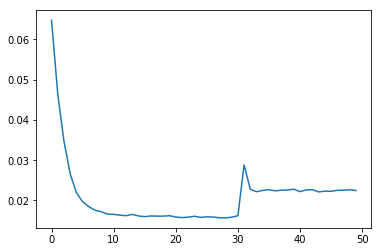

In [148]:
costsNPArray = np.array(costs)
epochXaxis = np.arange(len(costs))
plt.plot(epochXaxis, costsNPArray)
plt.show()

costsFilePath = '/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__epochsNum_'+str(num_epochs)+'.npy'
np.save(costsFilePath, costsNPArray )

In [149]:
np.load(costsFilePath)
# filepath

array([0.0647672 , 0.04641966, 0.03471443, 0.02663976, 0.02192029,
       0.01970959, 0.01845553, 0.01755938, 0.0171982 , 0.01660422,
       0.01654085, 0.01634365, 0.01621262, 0.01652126, 0.01615006,
       0.0159698 , 0.01614199, 0.01610396, 0.01610836, 0.01620547,
       0.01587727, 0.01573968, 0.01584721, 0.01606645, 0.01579885,
       0.01592844, 0.01588698, 0.01569943, 0.01565967, 0.01583383,
       0.01620939, 0.02880385, 0.02278177, 0.02216931, 0.02250067,
       0.02267798, 0.02239106, 0.02253839, 0.02259601, 0.02280519,
       0.02219826, 0.022607  , 0.0226754 , 0.02211113, 0.02231681,
       0.02226554, 0.02251199, 0.02253624, 0.02265881, 0.02246234])

# This is to figure out the F1 multi class label predictions 

# Restoring the Model

In [258]:
filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+".ckpt"

graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        
        #define the graph
        X, Y = create_placeholders(64, 64, 26, 35)
        parameters = initialize_parameters()
        Z3 = forward_prop(X, parameters)
        #optimization 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

        #calculating the accuracy of the model 
        softmaxZ3 = tf.nn.softmax(Z3) # size will be 2200, 34
        output_class = tf.argmax(softmaxZ3,1) # size will be 2200, 1 or just (2200,)
        num_correct = tf.equal(output_class, tf.argmax(Y,1)) # must compare 2200
        num_correct_to_int = tf.cast(num_correct, tf.float32)
        accuracy = tf.reduce_mean(num_correct_to_int)
        
        
        saver = tf.train.Saver()

        saver.restore(sess , filepath)
        print("Model restored.")
        
    

INFO:tensorflow:Restoring parameters from /home/muhammadayub/Desktop/CS230/models_saved/model1/model_12_7__0_0.ckpt
Model restored.


In [144]:
len(devMiniBatches)
len(minibatches)
len(testMiniBatches)

38

# Restore the Graph and Calculate the Test Set Accuracy / F1 Score

In [223]:
filepath = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+".ckpt"
# dev_test_or_train = 1
# if(dev_test_or_train ==1): #train

filepathEvalMetrics = "/home/muhammadayub/Desktop/CS230/models_saved/model3/model_12_9__"+str(49)+"_"+str(60)+"_evalMetrics_train.npy"
accuracies= []
minibatches_to_test_accuracy_of = copy.deepcopy(minibatches[:38])  # or devMiniBatches or testMiniBatches for test error 

print(" Running ", len(minibatches_to_test_accuracy_of) , " minibatches to get the evaluation metrics")
output_classes = []
predicted_classes = []

preds_one_hot_ev_value = None
output_one_hot_ev_value =None 


graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:
        
        #define the graph
        X, Y = create_placeholders(64, 64, 26, 35)
        parameters = initialize_parameters()
        Z3 = forward_prop(X, parameters)
        #optimization 
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)#1e-4).minimize(cross_entropy)

        #calculating the accuracy of the model 
        softmaxZ3 = tf.nn.softmax(Z3) # size will be 2200, 34
        output_class = tf.argmax(softmaxZ3,1) # size will be 2200, 1 or just (2200,)  # this is the predictions vector
        output_class_of_data =  tf.argmax(Y,1)
        num_correct = tf.equal(output_class, output_class_of_data) # must compare 2200
        num_correct_to_int = tf.cast(num_correct, tf.float32)
        accuracy = tf.reduce_mean(num_correct_to_int)
        
        
        saver = tf.train.Saver()

        saver.restore(sess , filepath)
        print("Model restored.")
        
        np.random.shuffle(minibatches_to_test_accuracy_of)
        
        #devMiniBatches 
        #testMiniBatches
        for i_ , minibatch in enumerate(minibatches_to_test_accuracy_of):
            inputImage, output_image = generateMinibatch(minibatch)
            inputImage64, output_image64 = transformTo64(inputImage, output_image,35)
            output_image64 = output_image64[WaterWayMask]
            inputImage64 = inputImage64[WaterWayMask]
            #temp_cost = sess.run([cost], feed_dict={X: inputImage64, Y: output_image64})
            predicted_classes_val, output_class_val, accuracy_val = sess.run([output_class, output_class_of_data, accuracy], feed_dict={X: inputImage64, Y: output_image64})
            accuracies.append(accuracy_val)
            output_classes.append(output_class_val)
            predicted_classes.append(predicted_classes_val)
            
#             print(output_class_val.shape) #wrapped in list 
#             print(predicted_classes_val.shape)
            print('Minibatch: ', str(i_), " ", datetime.datetime.now())
            
            
#new graph for concatenating things and getting into the right format for the F1 score 
graph = tf.Graph()
with graph.as_default(): 
    with tf.Session(graph=graph) as sess:            
    
        val1 = tf.concat(output_classes, axis = 0)
        
    
        #after running the minibatches-> we can concatenate the values 
        preds = tf.concat(predicted_classes,axis = 0)
        data_outputs = tf.concat(output_classes,axis = 0)
        
        d = 35 # d is the total number of classes you have 
        #classLabels =  np.array([2,3,5,6,5,4,2,0,0])# the indexes 
        # tf.one_hot(classLabels, d)

        preds_one_hot = tf.one_hot(preds, d)
        data_outputs_one_hot =tf.one_hot(data_outputs, d)#evaluated 
        preds_one_hot_ev, output_one_hot_ev = sess.run([preds_one_hot, data_outputs_one_hot])
        
        preds_one_hot_ev_value =preds_one_hot_ev
        output_one_hot_ev_value =output_one_hot_ev
        
#For Debugging below:
#         zVal = sess.run([Z3], feed_dict={X: inputImage64, Y: output_image64})
#         softMaxVal = sess.run([softmaxZ3], feed_dict={X: inputImage64, Y: output_image64})
#         output_class_val = sess.run([output_class], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_val = sess.run([num_correct], feed_dict={X: inputImage64, Y: output_image64})
#         num_correct_to_int_val = sess.run([num_correct_to_int], feed_dict={X: inputImage64, Y: output_image64})

 Running  38  minibatches to get the evaluation metrics
INFO:tensorflow:Restoring parameters from /home/muhammadayub/Desktop/CS230/models_saved/model2/model_12_7__49_60.ckpt
Model restored.
Minibatch:  0   2018-12-08 22:05:53.477843
Minibatch:  1   2018-12-08 22:05:59.675679
Minibatch:  2   2018-12-08 22:06:05.875645
Minibatch:  3   2018-12-08 22:06:12.224315
Minibatch:  4   2018-12-08 22:06:18.420786
Minibatch:  5   2018-12-08 22:06:24.764895
Minibatch:  6   2018-12-08 22:06:30.967698
Minibatch:  7   2018-12-08 22:06:37.177049
Minibatch:  8   2018-12-08 22:06:43.290872
Minibatch:  9   2018-12-08 22:06:49.493933
Minibatch:  10   2018-12-08 22:06:55.583445
Minibatch:  11   2018-12-08 22:07:01.733232
Minibatch:  12   2018-12-08 22:07:07.844373
Minibatch:  13   2018-12-08 22:07:14.030304
Minibatch:  14   2018-12-08 22:07:20.139519
Minibatch:  15   2018-12-08 22:07:26.341066
Minibatch:  16   2018-12-08 22:07:32.535971
Minibatch:  17   2018-12-08 22:07:38.741126
Minibatch:  18   2018-12-08 

In [141]:
_y_true_ = None
_y_pred_ = None 
_f1Score_ = None 
_precision_ = None 
_recall_ =None 
TPVal = None
FPVal = None
FNVal = None 
_f1_ = None 
#using the F1 function found online -> get the values for the predictions  
graph = tf.Graph()
with graph.as_default(): 
    y_true = tf.Variable(output_one_hot_ev_value)
    y_pred = tf.Variable(preds_one_hot_ev_value)
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)

    #moded from -> https://stackoverflow.com/questions/35365007/tensorflow-precision-recall-f1-score-and-confusion-matrix
    TP = tf.count_nonzero(y_pred * y_true, axis=0) 
    FP = tf.count_nonzero(y_pred * (y_true - 1), axis=0) 
    FN = tf.count_nonzero((y_pred - 1) * y_true, axis=0)  # .001 for numerical stability 

    #they are integers right now and should be floats for numerical stability 
    TP = tf.cast(TP, tf.float32)
    FP = tf.cast(FP, tf.float32)
    FN = tf.cast(FN, tf.float32)
    
    
    precision = TP / (TP + FP+tf.constant(.001))
    recall = TP / (TP + FN+tf.constant(.001))
    f1 = 2 * precision * recall / (precision + recall+tf.constant(.001))

    f1Score = tf.reduce_mean(f1)

    
    with tf.Session(graph=graph) as sess:    
        tf.global_variables_initializer().run(session=sess)
        _f1_, _y_true_, _y_pred_, _f1Score_ , _precision_ ,_recall_ , TPVal,FPVal, FNVal = sess.run([f1, y_true, y_pred, f1Score, precision ,recall, TP,FP, FN ])          


In [142]:
filepathEvalMetrics
_f1_

array([0.9762635, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       ],
      dtype=float32)

In [130]:
accuracyArray = np.array(['Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100 , 
                          '_y_true_' , str(_y_true_),
                            '_y_pred_' ,str(_y_pred_) ,
                            '_f1Score_' ,str(_f1Score_) ,
                            '_precision_' ,str(_precision_) ,
                            '_recall_' ,str(_recall_) ,
                            'TPVal' ,str(TPVal),
                            'FPVal' , str(FPVal),
                            'FNVal' , str(FNVal)
                          ])
# we are only interested in the F1 score at the Macro level
print('F1 score (multiclass): ' , mac)        
print('Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100)

F1 score (multiclass):  nan
Accuracy 95.45813234228837


In [ ]:
#write the values out to the numpy file 
print(accuracyArray)
np.save(filepathEvalMetrics,accuracyArray)

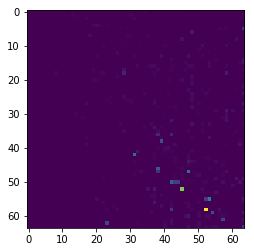

(3200, 64, 64)


In [45]:
# output_image64[:]
plt.imshow(inputImage64[10, :,:,10])
plt.show()
output_image64_intermediate = split256by256StackOnAxis(output_image)
# output_image64 = getOutputYVector(output_image64, numCats)
print(output_image64_intermediate.shape)


In [254]:
print('Accuracy', sum(np.array(accuracies).flatten())/len(accuracies)*100)


Accuracy 100.0


In [48]:
output_image64_intermediate[10].dtype

# plt.imshow(output_image64_intermediate[10])
# plt.show()

dtype('float16')

In [148]:
print(datetime.datetime.now())
WaterWayMask = generateWaterWayMask(waterway, 400)
inputImage, output_image = generateMinibatch(minibatches[10])
# print(inputImage.dtype)
# print(output_image.dtype)
inputImage64, output_image64 = transformTo64(inputImage, output_image,34)
# print(inputImage64.dtype)
# print(output_image64.dtype)
output_image64 = output_image64[WaterWayMask]
inputImage64 = inputImage64[WaterWayMask]
# print(inputImage64.dtype)
# print(output_image64.dtype)
print(datetime.datetime.now())


2018-12-06 18:59:36.103546


/home/muhammadayub/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:40: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/home/muhammadayub/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:41: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


(array([0]),)
(array([0]),)
2018-12-06 18:59:43.296475


In [143]:
print(inputImage64.shape)
print(output_image64.shape)
print(inputImage64.dtype)
print(output_image64.dtype)
print(len(WaterWayMask))

(1600, 64, 64, 26)
(1600, 34)
float64
float64
1600
